### Create a SQLite Database

For practice purposes, it's advisable to create your own database, so that you are free to perform any operations on it. If using the SQLite shell, we can apply the ***open*** command to both create a SQLite database or open it in case it already exists just like:

> sqlite> .open testdb

Similarly, we can use ipython-sql to the same thing:

In [ ]:
%sql sqlite:///data/writers.db3

### Create a table

***%%sql*** let you use multiple SQL statements inside a single cell. 

It is now time to create one using a standard SQL command – CREATE TABLE. If the table already existed in the database, an error will pop up. In addition, we set ***PRIMARY KEY*** on USERID to prevent from inserting duplicate writers into the table.

In [ ]:
%%sql sqlite://
CREATE TABLE writer(
    FirstName VARCHAR(50) NOT NULL,
    LastName VARCHAR(50) NOT NULL,  
    USERID int  NOT NULL UNIQUE, 
    PRIMARY KEY (USERID)
);

### Add data to the table

The table we have just created is empty. Now we insert some sample data inside it. To populate this data in the form of rows, we use the command INSERT.

In [ ]:
%%sql sqlite://
INSERT INTO writer VALUES ('William', 'Shakespeare', 1616);
INSERT INTO writer VALUES ('Lin', 'Han', 1996);
INSERT INTO writer VALUES ('Peter', 'Brecht', 1978);

### Write the First Query

Let us now turn our attention to writing a simple query to check the results of our previous operations in which we created a table and inserted three rows of data into it. For this, we would use the command called SELECT.

we can put the query result into a variable such as the following sqlres.

In [ ]:
sqlres = %sql SELECT * from writer
sqlres

You also can select the specific colummns using their names just like:

In [ ]:
sqlres = %sql SELECT FirstName, LastName from writer
sqlres

# Query Table Information

This notebook will show how to query the number of tables and a table'columns given a database using the powerful **SELECT**.

In [1]:
%load_ext sql

### Connect to the given database of demo.db3

In [2]:
%sql sqlite:///data/demo.db3

### List  tables in a database

Table and index names can be list by doing a **SELECT** on a special table named "***SQLITE_MASTER***". Every SQLite database has an SQLITE_MASTER table that defines the schema for the database. For tables, the ***type*** field will always be '***table***' and the name field will be the name of the table. So to get a list of all tables in the database, use the following SELECT command:

See more at https://www.sqlite.org/faq.html#q7.

In [3]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### List columns in a table

We take the table of rch as an example

In [4]:
%sql select * from rch where 1=0

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,EVAPcms,TLOSScms,SED_INtons,SED_OUTtons,SEDCONCmg_kg,ORGN_INkg,ORGN_OUTkg,ORGP_INkg,ORGP_OUTkg,NO3_INkg,NO3_OUTkg,NH4_INkg,NH4_OUTkg,NO2_INkg,NO2_OUTkg,MINP_INkg,MINP_OUTkg,CHLA_INkg,CHLA_OUTkg,CBOD_INkg,CBOD_OUTkg,DISOX_INkg,DISOX_OUTkg,SOLPST_INmg,SOLPST_OUTmg,SORPST_INmg,SORPST_OUTmg,REACTPSTmg,VOLPSTmg,SETTLPSTmg,RESUSP_PSTmg,DIFFUSEPSTmg,REACBEDPSTmg,BURYPSTmg,BED_PSTmg,BACTP_OUTct,BACTLP_OUTct,CMETAL_1kg,CMETAL_2kg,CMETAL_3kg,TOT_Nkg,TOT_Pkg,NO3ConcMg_l,WTMPdegc


#### :) We get the table information just using SELECT * with key work of LIMIT

You can try to change the limit number to 1, 2 to check the results.

In [5]:
%sql select * from rch LIMIT 0

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,EVAPcms,TLOSScms,SED_INtons,SED_OUTtons,SEDCONCmg_kg,ORGN_INkg,ORGN_OUTkg,ORGP_INkg,ORGP_OUTkg,NO3_INkg,NO3_OUTkg,NH4_INkg,NH4_OUTkg,NO2_INkg,NO2_OUTkg,MINP_INkg,MINP_OUTkg,CHLA_INkg,CHLA_OUTkg,CBOD_INkg,CBOD_OUTkg,DISOX_INkg,DISOX_OUTkg,SOLPST_INmg,SOLPST_OUTmg,SORPST_INmg,SORPST_OUTmg,REACTPSTmg,VOLPSTmg,SETTLPSTmg,RESUSP_PSTmg,DIFFUSEPSTmg,REACBEDPSTmg,BURYPSTmg,BED_PSTmg,BACTP_OUTct,BACTLP_OUTct,CMETAL_1kg,CMETAL_2kg,CMETAL_3kg,TOT_Nkg,TOT_Pkg,NO3ConcMg_l,WTMPdegc


#### Or directly use select *

***Warning***! This table contains too many records. It'd better not query all of them.

# Retrieving Data with SELECT

When working with databases and SQL, the most common task is to request data from one or more tables, which returns this data in the form of a result table. These result tables are called result-sets. The ***SELECT*** statement accomplishes this. In most applications, ***SELECT*** is the most commonly used data query language (DQL) command. Moreover, the ***SELECT*** can do far more than simply retrieve and display data and I will show you in the following sections.

***SELECT Syntax***

- *SELECT column1, column2, columnN FROM table_name;*

Here, column1, column2... are the fields (or columns) of a table (table_name).

However, if you want query all records, just use:
- SELECT * FROM table_name;

In [6]:
%reload_ext sql

### 1. Connect to the given database of demo.db3

In [7]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the follow command to query. Here we select the table of watershed_yearly as an example.

In [8]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. Retrieving all data

As we alreay know, the most common SQL operation is a SELECT statement, which pulls data from a table and then displays the results. Let’s write our first SQL statement. 

In [9]:
%sql SELECT * From watershed_yearly

 * sqlite:///data/demo.db3
Done.


YR,PREC_mm,SURQ_mm,LATQ_mm,GWQ_mm,PERCOLA_mm,TILEQ_mm,SW_mm,ET_mm,PET_mm,WYLD_mm,SYLD_tons,NO3_SURQ,NO3_LATQ,NO3_PERC,NO3_CROP,N_ORG,P_SOL,P_ORG,TILENO3
1981,895.6051025390625,130.3574676513672,51.33439254760742,406.0739440917969,443.198486328125,0.0,18819.70703125,236.98300170898438,840.6874389648438,609.706787109375,91.08026123046875,0.03293686360120773,0.06417319178581238,5.615890026092529,7.339915752410889,11.857464790344238,0.008220621384680271,1.461671233177185,0.0
1982,884.670654296875,92.21265411376953,50.34769058227539,367.41070556640625,424.6783752441406,0.0,19425.8359375,256.79083251953125,872.07470703125,530.0245971679688,64.80978393554688,0.00797836109995842,0.04918050765991211,4.239809036254883,7.676506042480469,10.873835563659668,0.007697358727455139,1.343782901763916,0.0
1983,816.6605224609375,129.16310119628906,54.47308349609375,445.33306884765625,462.76324462890625,0.0,18476.1953125,237.70555114746094,797.04736328125,652.8157958984375,92.04792785644531,0.13790887594223022,0.048595353960990906,3.882063388824463,7.301627159118652,12.202207565307617,0.015354366973042488,1.5196093320846558,0.0
1984,867.5743408203125,95.57946014404297,46.948646545410156,347.2448425292969,408.5397033691406,0.0,17727.712890625,223.08975219726562,911.25634765625,510.37933349609375,63.0908203125,0.01470834668725729,0.0440557599067688,5.141480922698975,6.492110729217529,10.941608428955078,0.011575199663639069,1.3742408752441406,0.0
1985,637.7255249023438,75.55760192871094,45.336883544921875,358.2953186035156,361.4852294921875,0.0,15840.5400390625,236.32135009765625,990.8557739257812,499.33990478515625,49.63069152832031,0.05470645800232887,0.046555422246456146,3.113034963607788,6.522554874420166,8.959033966064453,0.010798747651278973,1.1150814294815063,0.0
1986,733.8412475585938,65.63016510009766,36.76259231567383,241.9388427734375,281.6683349609375,0.0,16059.4345703125,243.0305633544922,977.513427734375,358.09368896484375,48.7893180847168,0.0010510582942515612,0.040558818727731705,2.8865158557891846,6.505890369415283,7.870068073272705,0.013286528177559376,0.970182478427887,0.0
1987,1007.8944702148438,110.28632354736328,62.23741912841797,445.5394592285156,493.0043029785156,0.0,19541.869140625,256.9570007324219,841.0055541992188,641.2118530273438,76.02854919433594,0.013590915128588676,0.05216805264353752,3.6147713661193848,5.987320899963379,14.57848834991455,0.019578929990530014,1.8156678676605225,0.0
1988,895.8466186523438,149.65235900878906,61.493255615234375,450.4956970214844,493.1164245605469,0.0,17205.849609375,220.8395233154297,891.13330078125,686.12744140625,101.2978744506836,0.025784092023968697,0.04415411874651909,3.241307258605957,5.892490386962891,13.989458084106445,0.030675839632749557,1.7415385246276855,0.0
1989,930.10546875,111.37128448486328,57.6666145324707,418.1727600097656,474.9247741699219,0.0,17915.3359375,208.58026123046875,805.931884765625,609.6959838867188,74.79584503173828,0.016387958079576492,0.04736720025539398,3.692014217376709,5.3133368492126465,10.229286193847656,0.025520162656903267,1.2660586833953857,0.0
1990,751.4553833007812,102.00208282470703,54.310569763183594,409.75189208984375,435.1587829589844,0.0,16842.517578125,213.63233947753906,966.4890747070312,589.3450317382812,73.0428695678711,0.007093863561749458,0.04154253378510475,3.0770206451416016,5.872688293457031,9.7684326171875,0.025202790275216103,1.2055107355117798,0.0


### 3. Retrieving data from specific columns

In many cases, it is not necessary to pull all columns in a SELECT statement. You can also pick and choose only the columns you are interested in. The following query will only pull the ***YR***, ***PREC_mm*** and ***PET_mm*** columns:

In [10]:
%sql SELECT YR, PREC_mm, PET_mm From watershed_yearly

 * sqlite:///data/demo.db3
Done.


YR,PREC_mm,PET_mm
1981,895.6051025390625,840.6874389648438
1982,884.670654296875,872.07470703125
1983,816.6605224609375,797.04736328125
1984,867.5743408203125,911.25634765625
1985,637.7255249023438,990.8557739257812
1986,733.8412475585938,977.513427734375
1987,1007.8944702148438,841.0055541992188
1988,895.8466186523438,891.13330078125
1989,930.10546875,805.931884765625
1990,751.4553833007812,966.4890747070312


### 4. Do some calculations in SELECT Statements

:) The SELECT statement can do far more than simply select columns. 

Sometimes, we are also intersted in the relationship between columns. This can be done with expressions in SELECT Statements. For example, I'd like to see the difference between ***PREC_mm*** and ***PET_mm*** columns (using the minus operator **-**). You can also try other operators such as +, *, / or %.

In [11]:
%sql SELECT YR, PREC_mm, PET_mm, PET_mm-PREC_mm From watershed_yearly

 * sqlite:///data/demo.db3
Done.


YR,PREC_mm,PET_mm,PET_mm-PREC_mm
1981,895.6051025390625,840.6874389648438,-54.91766357421875
1982,884.670654296875,872.07470703125,-12.595947265625
1983,816.6605224609375,797.04736328125,-19.6131591796875
1984,867.5743408203125,911.25634765625,43.6820068359375
1985,637.7255249023438,990.8557739257812,353.1302490234375
1986,733.8412475585938,977.513427734375,243.67218017578125
1987,1007.8944702148438,841.0055541992188,-166.888916015625
1988,895.8466186523438,891.13330078125,-4.71331787109375
1989,930.10546875,805.931884765625,-124.173583984375
1990,751.4553833007812,966.4890747070312,215.03369140625


It is amazing, is'nt it? However, the exmpression is presented as a new column name. It is not that beautiful.
***It is quite easy for us to give it a new name using an AS statement (this is known as an alias).***

In [12]:
%sql SELECT YR, PREC_mm, PET_mm, PET_mm-PREC_mm as PED_mm From watershed_yearly

 * sqlite:///data/demo.db3
Done.


YR,PREC_mm,PET_mm,PED_mm
1981,895.6051025390625,840.6874389648438,-54.91766357421875
1982,884.670654296875,872.07470703125,-12.595947265625
1983,816.6605224609375,797.04736328125,-19.6131591796875
1984,867.5743408203125,911.25634765625,43.6820068359375
1985,637.7255249023438,990.8557739257812,353.1302490234375
1986,733.8412475585938,977.513427734375,243.67218017578125
1987,1007.8944702148438,841.0055541992188,-166.888916015625
1988,895.8466186523438,891.13330078125,-4.71331787109375
1989,930.10546875,805.931884765625,-124.173583984375
1990,751.4553833007812,966.4890747070312,215.03369140625


Besides giving names to expressions using aliases, aliases can also be used to rename an existing column within the query. For example, we rename ***PREC_mm*** to ***Precipitation_mm***.

***However, keep in mind that such an operatation does not affect the real data or change the name in the table.It only change the way you see it on your screen.*** You can always try SELECT * From watershed_yearly to see the truth.

In [13]:
%sql SELECT YR, PREC_mm as Precipitation_mm, PET_mm, PET_mm-PREC_mm as PED_mm From watershed_yearly

 * sqlite:///data/demo.db3
Done.


YR,Precipitation_mm,PET_mm,PED_mm
1981,895.6051025390625,840.6874389648438,-54.91766357421875
1982,884.670654296875,872.07470703125,-12.595947265625
1983,816.6605224609375,797.04736328125,-19.6131591796875
1984,867.5743408203125,911.25634765625,43.6820068359375
1985,637.7255249023438,990.8557739257812,353.1302490234375
1986,733.8412475585938,977.513427734375,243.67218017578125
1987,1007.8944702148438,841.0055541992188,-166.888916015625
1988,895.8466186523438,891.13330078125,-4.71331787109375
1989,930.10546875,805.931884765625,-124.173583984375
1990,751.4553833007812,966.4890747070312,215.03369140625


# Constrain the Number of Rows Returned by a SELECT Query

Often it is not convenient to show all rows on screen as you have to scroll. We can use use SQLite ***LIMIT*** clause to constrain the number of rows returned by a query. This can be used for testing or to prevent consuming excessive resources if the query returns more information than expected.

The following illustrates the syntax of the LIMIT clause:
- SELECT column_list FROM table_name LIMIT row_count;

In [14]:
%reload_ext sql

### 1. Connect to the given database of demo.db3

In [15]:
%sql sqlite:///data/demo.db3

### 2. Retrieving the first 10 rows of the table of watershed_yearly

Add the LIMIT clause to the SELECT statement to get exact 10 rows.

In [16]:
%sql SELECT * From watershed_yearly LIMIT 10

 * sqlite:///data/demo.db3
Done.


YR,PREC_mm,SURQ_mm,LATQ_mm,GWQ_mm,PERCOLA_mm,TILEQ_mm,SW_mm,ET_mm,PET_mm,WYLD_mm,SYLD_tons,NO3_SURQ,NO3_LATQ,NO3_PERC,NO3_CROP,N_ORG,P_SOL,P_ORG,TILENO3
1981,895.6051025390625,130.3574676513672,51.33439254760742,406.0739440917969,443.198486328125,0.0,18819.70703125,236.98300170898438,840.6874389648438,609.706787109375,91.08026123046875,0.03293686360120773,0.06417319178581238,5.615890026092529,7.339915752410889,11.857464790344238,0.008220621384680271,1.461671233177185,0.0
1982,884.670654296875,92.21265411376953,50.34769058227539,367.41070556640625,424.6783752441406,0.0,19425.8359375,256.79083251953125,872.07470703125,530.0245971679688,64.80978393554688,0.00797836109995842,0.04918050765991211,4.239809036254883,7.676506042480469,10.873835563659668,0.007697358727455139,1.343782901763916,0.0
1983,816.6605224609375,129.16310119628906,54.47308349609375,445.33306884765625,462.76324462890625,0.0,18476.1953125,237.70555114746094,797.04736328125,652.8157958984375,92.04792785644531,0.13790887594223022,0.048595353960990906,3.882063388824463,7.301627159118652,12.202207565307617,0.015354366973042488,1.5196093320846558,0.0
1984,867.5743408203125,95.57946014404297,46.948646545410156,347.2448425292969,408.5397033691406,0.0,17727.712890625,223.08975219726562,911.25634765625,510.37933349609375,63.0908203125,0.01470834668725729,0.0440557599067688,5.141480922698975,6.492110729217529,10.941608428955078,0.011575199663639069,1.3742408752441406,0.0
1985,637.7255249023438,75.55760192871094,45.336883544921875,358.2953186035156,361.4852294921875,0.0,15840.5400390625,236.32135009765625,990.8557739257812,499.33990478515625,49.63069152832031,0.05470645800232887,0.046555422246456146,3.113034963607788,6.522554874420166,8.959033966064453,0.010798747651278973,1.1150814294815063,0.0
1986,733.8412475585938,65.63016510009766,36.76259231567383,241.9388427734375,281.6683349609375,0.0,16059.4345703125,243.0305633544922,977.513427734375,358.09368896484375,48.7893180847168,0.0010510582942515612,0.040558818727731705,2.8865158557891846,6.505890369415283,7.870068073272705,0.013286528177559376,0.970182478427887,0.0
1987,1007.8944702148438,110.28632354736328,62.23741912841797,445.5394592285156,493.0043029785156,0.0,19541.869140625,256.9570007324219,841.0055541992188,641.2118530273438,76.02854919433594,0.013590915128588676,0.05216805264353752,3.6147713661193848,5.987320899963379,14.57848834991455,0.019578929990530014,1.8156678676605225,0.0
1988,895.8466186523438,149.65235900878906,61.493255615234375,450.4956970214844,493.1164245605469,0.0,17205.849609375,220.8395233154297,891.13330078125,686.12744140625,101.2978744506836,0.025784092023968697,0.04415411874651909,3.241307258605957,5.892490386962891,13.989458084106445,0.030675839632749557,1.7415385246276855,0.0
1989,930.10546875,111.37128448486328,57.6666145324707,418.1727600097656,474.9247741699219,0.0,17915.3359375,208.58026123046875,805.931884765625,609.6959838867188,74.79584503173828,0.016387958079576492,0.04736720025539398,3.692014217376709,5.3133368492126465,10.229286193847656,0.025520162656903267,1.2660586833953857,0.0
1990,751.4553833007812,102.00208282470703,54.310569763183594,409.75189208984375,435.1587829589844,0.0,16842.517578125,213.63233947753906,966.4890747070312,589.3450317382812,73.0428695678711,0.007093863561749458,0.04154253378510475,3.0770206451416016,5.872688293457031,9.7684326171875,0.025202790275216103,1.2055107355117798,0.0


### Note

Some DBMSs offer non-standard syntax either instead of or in addition to SQL standard syntax. Variants of the simple ***limit*** query for different DBMSes can be found at https://en.wikipedia.org/wiki/Select_(SQL)

# Filtering a Query with WHERE

Sometimes, you’ll want to only check the rows returned by a query, where one or more columns meet certain criteria. This can be done with a WHERE statement. The WHERE clause is an optional clause of the SELECT statement. It appears after the FROM clause as the following statement:
>SELECT column_list FROM table_name WHERE search_condition;

In [17]:
%reload_ext sql

### 1. Connect to the given database of demo.db3

In [18]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the follow command to query. Here we select the table of watershed_yearly as an example.

In [19]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. Retrieving data with WHERE

Take the table of ***rch*** as an example.

#### 2.1 Check the table colums firstly.

In [20]:
%sql SELECT * From rch LIMIT 5

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,EVAPcms,TLOSScms,SED_INtons,SED_OUTtons,SEDCONCmg_kg,ORGN_INkg,ORGN_OUTkg,ORGP_INkg,ORGP_OUTkg,NO3_INkg,NO3_OUTkg,NH4_INkg,NH4_OUTkg,NO2_INkg,NO2_OUTkg,MINP_INkg,MINP_OUTkg,CHLA_INkg,CHLA_OUTkg,CBOD_INkg,CBOD_OUTkg,DISOX_INkg,DISOX_OUTkg,SOLPST_INmg,SOLPST_OUTmg,SORPST_INmg,SORPST_OUTmg,REACTPSTmg,VOLPSTmg,SETTLPSTmg,RESUSP_PSTmg,DIFFUSEPSTmg,REACBEDPSTmg,BURYPSTmg,BED_PSTmg,BACTP_OUTct,BACTLP_OUTct,CMETAL_1kg,CMETAL_2kg,CMETAL_3kg,TOT_Nkg,TOT_Pkg,NO3ConcMg_l,WTMPdegc
1,1981,1,146.34376525878906,146.2524871826172,0.09128088504076004,0.0,2.3320461650655488e-07,61619.46484375,155.3719024658203,0.016086287796497345,0.0,0.04825887829065323,0.0,362.0486755371094,361.8135070800781,203.620849609375,421.18377685546875,0.0,23.0184326171875,0.016107244417071342,0.0,1.1839052307949238e-11,0.0,0.0,0.0,5627225.0,5623486.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.0157470703125,0.0,0.0,0.0
2,1981,1,96.22569274902344,96.18285369873047,0.042821284383535385,0.0,1.6426764659627224e-07,0.0,0.0,0.01363153662532568,0.0,0.04089462012052536,0.0,315.60052490234375,315.4579772949219,0.0,127.00502014160156,0.0,0.0,0.013656049966812134,0.0,4.136972177163251e-16,0.0,0.0,0.0,3757606.5,3698301.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.4630126953125,0.0,0.0,0.0
3,1981,1,11.952718734741211,11.861368179321289,0.09135182946920395,0.0,2.0325823868461157e-07,2.0325823868461157e-07,6.595060941805286e-09,0.01146628800779581,0.0,0.03439886122941971,0.009118038229644299,48.2963752746582,47.93150329589844,0.0,62.467620849609375,0.0,0.0,0.011485105380415916,0.0,5.941028783295818e-14,0.0,0.0,0.0,360979.90625,456115.90625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.39912414550781,0.009118038229644299,0.0,0.0
4,1981,1,49.48649215698242,49.40651321411133,0.07998340576887131,0.0,3.913226720442253e-08,0.0,0.0,0.00722243869677186,0.0,0.021667316555976868,0.0,46.54270553588867,46.46895217895508,0.0,76.61585235595703,0.0,0.0,0.0072422930970788,0.0,1.1632789449796794e-15,0.0,0.0,0.0,1160040.75,1899717.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.08480834960938,0.0,0.0,0.0
5,1981,1,274.0668029785156,272.10601806640625,1.9608064889907837,0.0,2257869.75,116675.171875,157.49276733398438,1408498.0,1259125.625,501261.6875,416320.25,46281.1640625,44271.08984375,483.65142822265625,1362.450439453125,23.0184326171875,66.76303100585938,1289.9833984375,3866.024169921875,26296.953125,0.0,54013716.0,21046212.0,9425129.0,9136200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1304826.0,420186.28125,0.0,0.0


#### 2.2 Check the number of rows

There should be 8280 rows. This can be done with the SQLite ***COUNT*** function. We will touch other SQLite function over the next few notebooks.

In [21]:
%sql SELECT COUNT(*) as nrow From rch

 * sqlite:///data/demo.db3
Done.


nrow
8280


#### 2.3 Use WHERE to retrieve data

Let’s say we are interested in records for only the year 1981. Using a WHERE is pretty straightforward for a simple criterion like this. 

In [22]:
%sql SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms From rch WHERE YR=1981

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
1,1981,1,146.34376525878906,146.2524871826172
2,1981,1,96.22569274902344,96.18285369873047
3,1981,1,11.952718734741211,11.861368179321289
4,1981,1,49.48649215698242,49.40651321411133
5,1981,1,274.0668029785156,272.10601806640625
6,1981,1,486.71063232421875,486.3185729980469
7,1981,1,23.57549476623535,23.289026260375977
8,1981,1,215.61805725097656,214.28143310546875
9,1981,1,193.72772216796875,193.4912109375
10,1981,1,53.9464225769043,53.8569450378418


#### 2.4 use *AND* to further filter data

There are 23 RCHs. We are only intersted in the 10th RCH. We can add another filter condition with an ***AND*** statement.

In [23]:
%sql SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms From rch WHERE YR=1981 AND RCH=10

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
10,1981,1,53.9464225769043,53.8569450378418
10,1981,2,29.24818229675293,29.110872268676758
10,1981,3,8.964656829833984,8.776240348815918
10,1981,4,14.47266674041748,14.112871170043945
10,1981,5,283.8179626464844,283.138671875
10,1981,6,295.1305847167969,294.55035400390625
10,1981,7,914.5076904296875,913.3176879882812
10,1981,8,484.74664306640625,483.5436706542969
10,1981,9,395.6681823730469,395.08782958984375
10,1981,10,283.00836181640625,282.70489501953125


#### 2.5 More combinations of filters

We also can further filter data with the operators of ***!=*** or ***<>*** to get data except 1981.

In [24]:
%sql SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms From rch WHERE YR<>1981 and RCH=10 and MO=6

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
10,1982,6,302.1027526855469,301.51776123046875
10,1983,6,365.0164489746094,364.4071350097656
10,1984,6,449.14593505859375,447.8120422363281
10,1985,6,758.1435546875,756.645263671875
10,1986,6,870.4126586914062,869.0577392578125
10,1987,6,1056.3834228515625,1055.8485107421875
10,1988,6,1113.9349365234375,1112.7064208984375
10,1989,6,987.1399536132812,986.5767822265625
10,1990,6,545.1495361328125,543.622314453125
10,1991,6,773.328369140625,772.1046142578125


We can further filter the data to spefic months using ***OR*** statement. For example, we'd like check the data in the months of 3, 6 and 9. However, we have to use ***()*** to make them as one condition.:) It is a trick. You can try!

In [25]:
%sql SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms From rch WHERE YR>2009 and RCH=10 and (MO=3 or MO=6 or MO=9 or MO=12)

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
10,2010,3,3.4298956394195557,3.0846056938171387
10,2010,6,736.3016357421875,734.9920654296875
10,2010,9,218.40797424316406,218.24456787109375
10,2010,12,36.9558219909668,36.877464294433594


Or we can simplify the above filter using the ***IN*** statement.

In [26]:
%sql SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms From rch WHERE YR>2009 and RCH=10 and MO in (3, 6, 9, 12)

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
10,2010,3,3.4298956394195557,3.0846056938171387
10,2010,6,736.3016357421875,734.9920654296875
10,2010,9,218.40797424316406,218.24456787109375
10,2010,12,36.9558219909668,36.877464294433594


Or the months are ***NOT*** in 3, 6, 9, 12

In [27]:
%sql SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms From rch WHERE YR>2009 and RCH=10 and MO NOT IN (3,6,9,12)

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
10,2010,1,9.619468688964844,9.422823905944824
10,2010,2,6.129702091217041,5.864690780639648
10,2010,4,258.67010498046875,258.1203918457031
10,2010,5,1513.6510009765625,1512.5479736328125
10,2010,7,583.045654296875,582.3214721679688
10,2010,8,371.0841369628906,370.7648010253906
10,2010,10,123.48409271240234,123.36622619628906
10,2010,11,68.6158676147461,68.5250473022461


#### 2.6 Filter with math operators

For example,  we could use the modulus operator (%) to filter the MOs.

In [28]:
%sql SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms From rch WHERE YR>2009 and RCH=10 and MO % 3 = 0

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
10,2010,3,3.4298956394195557,3.0846056938171387
10,2010,6,736.3016357421875,734.9920654296875
10,2010,9,218.40797424316406,218.24456787109375
10,2010,12,36.9558219909668,36.877464294433594


### Summary

In the WHERE statement, we can the combinations of ***NOT, IN, <>, !=, >=, >, <, <=, AND, OR, ()*** and even some of math operators (such as %, *, /, +, -)to retrieve the data we want easily and efficiently. 

# Doing Math Across Table Columns

As we already know, the demo database (i.e., demo.db3) was extraced from a numerical hydrological modeling. The major data types are of integers, decimals, or floating points. It is quite natural that we want to carry out some calculations or statistical analysis. SQL can handle calculations ranging from basic math through advanced statistics.

***Basic Math Operators***
<li>+ Addition
<li>- Subtraction
<li>* Multiplication
<li>/ Division (returns the quotient only, no remainder)
<li>% Modulo (returns just the remainder)
<li>^ Exponentiation
<li>Others 
    
Let’s try to use the most frequently used SQL math operators on the demo data. Instead of using numbers in queries, we’ll use the names of the columns that contain the numbers. When we execute the query, the calculation will occur on each row of the table.    

In [29]:
%reload_ext sql

### 1. Connect to the given database of demo.db3

In [30]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the following command to query.

In [31]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. Test Math Operator in an easy way

Using the SELECT statement, we can easily test the math operators.

In [32]:
%sql SELECT 3+4

 * sqlite:///data/demo.db3
Done.


3+4
7


In [33]:
%sql SELECT 12 * 4

 * sqlite:///data/demo.db3
Done.


12 * 4
48


In [34]:
%sql SELECT 12 % 4

 * sqlite:///data/demo.db3
Done.


12 % 4
0


In [35]:
%sql SELECT round(123.456,2) as Rounded

 * sqlite:///data/demo.db3
Done.


Rounded
123.46


### 3. Doing Math Across Table Columns

Take the table of watershed_monthly as an example

#### 3.1 Check the table colums firstly.

In [36]:
%sql SELECT * From watershed_monthly LIMIT 3

 * sqlite:///data/demo.db3
Done.


YR,MO,PREC_mm,SURQ_mm,LATQ_mm,GWQ_mm,PERCOLA_mm,TILEQ_mm,SW_mm,ET_mm,PET_mm,WYLD_mm,SYLD_tons,NO3_SURQ,NO3_LATQ,NO3_PERC,NO3_CROP,N_ORG,P_SOL,P_ORG,TILENO3
1981,1,96.2901611328125,0.5159813761711121,0.4125469923019409,6.688113689422607,19.906705856323242,0.0,1854.2242431640625,6.871741771697998,12.269017219543457,8.681976318359375,0.17933471500873566,0.00021739966177847236,0.0022701763082295656,1.3104768991470337,0.0,0.1262282431125641,0.00011268912930972874,0.015406808815896511,0.0
1981,2,160.22804260253906,3.346802234649658,0.6452788710594177,9.148776054382324,34.36812210083008,0.0,1766.2530517578125,9.165532112121582,14.773177146911621,13.862184524536133,1.2127171754837036,0.0006267096032388508,0.001955678453668952,1.174126386642456,0.0,0.8965995907783508,0.0005604379111900926,0.10999998450279236,0.0
1981,3,136.6529083251953,3.8249943256378174,1.4813165664672852,18.518495559692383,34.367244720458984,0.0,1990.7535400390625,13.520476341247559,23.363500595092773,25.018510818481445,1.2629601955413818,0.0008495681686326861,0.007548550609499216,0.5044968724250793,0.0,0.6799346208572388,0.0005445934948511422,0.08338834345340729,0.0


#### 3.2 Calculate the difference between two colummns

For example, we are interested in the difference between Potential evapotranspiration (PET_mm) and precipitation (PREC_mm). It is so-called Potential evapotranspiration deficit (PED). PED can be thought of as a drought index. It is the difference between how much water could potentially be lost from the soil through evapotranspiration and how much is actually available. When PED is high, plants do not have the full amount of water available they need for growth.

In [37]:
%%sql sqlite://
SELECT YR, MO,  
PREC_mm as Precipitation, 
PET_mm as PET, 
PET_mm-PREC_mm as PED
From watershed_monthly LIMIT 10

Done.


YR,MO,Precipitation,PET,PED
1981,1,96.2901611328125,12.269017219543457,-84.02114391326904
1981,2,160.22804260253906,14.773177146911621,-145.45486545562744
1981,3,136.6529083251953,23.363500595092773,-113.28940773010254
1981,4,118.85740661621094,36.195560455322266,-82.66184616088867
1981,5,84.54698181152344,89.7725601196289,5.225578308105469
1981,6,44.83718490600586,123.68331909179688,78.84613418579102
1981,7,32.325984954833984,174.00889587402344,141.68291091918945
1981,8,20.65149688720703,152.6374969482422,131.98600006103516
1981,9,16.57965660095215,115.8529052734375,99.27324867248535
1981,10,59.67293167114258,43.6953010559082,-15.977630615234375


###### We also can calculate the PED ratio to Precipitation.

In [38]:
%%sql sqlite://
SELECT YR, MO,  PREC_mm as Precipitation, 
PET_mm as PET, 
(PET_mm-PREC_mm)/PREC_mm*100.0 as PED_Ratio 
From watershed_monthly LIMIT 10

Done.


YR,MO,Precipitation,PET,PED_Ratio
1981,1,96.2901611328125,12.269017219543457,-87.25828571143332
1981,2,160.22804260253906,14.773177146911621,-90.7799053730202
1981,3,136.6529083251953,23.363500595092773,-82.90303449708202
1981,4,118.85740661621094,36.195560455322266,-69.54707200351655
1981,5,84.54698181152344,89.7725601196289,6.180679896716599
1981,6,44.83718490600586,123.68331909179688,175.84987628255342
1981,7,32.325984954833984,174.00889587402344,438.29418072534986
1981,8,20.65149688720703,152.6374969482422,639.1110570914423
1981,9,16.57965660095215,115.8529052734375,598.7654090904647
1981,10,59.67293167114258,43.6953010559082,-26.775340456351415


#### 3.3 Use math operators in a WHERE statement

For example, we could use the modulus operator (%) to filter the MOs.

In [39]:
%%sql sqlite://
SELECT RCH, YR, MO, FLOW_INcms, FLOW_OUTcms 
From rch 
WHERE YR>2009 
and RCH=10 
and MO % 3 = 0

Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms
10,2010,3,3.4298956394195557,3.0846056938171387
10,2010,6,736.3016357421875,734.9920654296875
10,2010,9,218.40797424316406,218.24456787109375
10,2010,12,36.9558219909668,36.877464294433594


### 4. Do some statistics with Aggregate Functions

So far, we’ve performed math operations across columns in each row of a table. We also can calculate a result from values within the same column using aggregate function, which calculate a single result from multiple inputs. Two of the most-used aggregate functions in data analysis are avg() and sum().

#### 4.1 average

avg - calculates the average of all values in that column (omits null values).

In [40]:
%%sql sqlite://
SELECT avg(FLOW_INcms), avg(FLOW_OUTcms) 
From rch 

Done.


avg(FLOW_INcms),avg(FLOW_OUTcms)
559.361707683415,557.2792260827198


#### 4.2 sum

sum - calculates the sum of the values in that column (omits null values).

In [41]:
%%sql sqlite://
SELECT sum(FLOW_INcms), sum(FLOW_OUTcms) 
From rch 

Done.


sum(FLOW_INcms),sum(FLOW_OUTcms)
4631514.939618677,4614271.9919649195


#### 4.3 extreme values

max - calculates the maximum value in that column (omits null values).

min - calculates the minimum value in that column (omits null values).

In [42]:
%%sql sqlite://
SELECT min(FLOW_INcms), max(FLOW_OUTcms) 
From rch 

Done.


min(FLOW_INcms),max(FLOW_OUTcms)
0.20121553540229797,10499.5498046875


### 5. Calculate by ourselves

We can calculated some values by the combination of those math operators. For example, we can calculate the average values of Flow_In and Flow_Out.

In [43]:
%%sql sqlite://
SELECT sum(FLOW_INcms)/COUNT(FLOW_INcms) as AVG_FlowIn, 
sum(FLOW_OUTcms)/COUNT(FLOW_OUTcms) as AVG_FlowOut
From rch 

Done.


AVG_FlowIn,AVG_FlowOut
559.361707683415,557.2792260827198


### Summary

Aggregating data (also referred to as rolling up, summarizing, or grouping data) is creating some sort of total from a number of records. Sum, min, max, count, and average are common aggregate operations.

In fact, the above example did not present the real power of these aggregation functions. They will become more powerful only when they are used with ***GROUP BY*** and ***ORDER BY*** clauses.

## Aggregating data with GROUP BY and ORDER BY

The ***GROUP BY*** clause is an optional clause of the SELECT statement. The GROUP BY clause a selected group of rows into summary rows by values of one or more columns. 

The GROUP BY clause returns one row for each group. For each group, you can apply an aggregate function such as ***MIN, MAX, SUM, COUNT, or AVG*** to provide more information about each group.

In [44]:
%reload_ext sql

### 1. Connet to the given database of demo.db3

In [45]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the following command to query.

In [46]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. Grouping data

Take the table of ***rch*** as an example

#### 2.1 Check the table colums firstly.

In [47]:
%sql SELECT * From rch LIMIT 3

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,EVAPcms,TLOSScms,SED_INtons,SED_OUTtons,SEDCONCmg_kg,ORGN_INkg,ORGN_OUTkg,ORGP_INkg,ORGP_OUTkg,NO3_INkg,NO3_OUTkg,NH4_INkg,NH4_OUTkg,NO2_INkg,NO2_OUTkg,MINP_INkg,MINP_OUTkg,CHLA_INkg,CHLA_OUTkg,CBOD_INkg,CBOD_OUTkg,DISOX_INkg,DISOX_OUTkg,SOLPST_INmg,SOLPST_OUTmg,SORPST_INmg,SORPST_OUTmg,REACTPSTmg,VOLPSTmg,SETTLPSTmg,RESUSP_PSTmg,DIFFUSEPSTmg,REACBEDPSTmg,BURYPSTmg,BED_PSTmg,BACTP_OUTct,BACTLP_OUTct,CMETAL_1kg,CMETAL_2kg,CMETAL_3kg,TOT_Nkg,TOT_Pkg,NO3ConcMg_l,WTMPdegc
1,1981,1,146.34376525878906,146.2524871826172,0.09128088504076004,0.0,2.3320461650655488e-07,61619.46484375,155.3719024658203,0.016086287796497345,0.0,0.04825887829065323,0.0,362.0486755371094,361.8135070800781,203.620849609375,421.18377685546875,0.0,23.0184326171875,0.016107244417071342,0.0,1.1839052307949238e-11,0.0,0.0,0.0,5627225.0,5623486.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.0157470703125,0.0,0.0,0.0
2,1981,1,96.22569274902344,96.18285369873047,0.042821284383535385,0.0,1.6426764659627224e-07,0.0,0.0,0.01363153662532568,0.0,0.04089462012052536,0.0,315.60052490234375,315.4579772949219,0.0,127.00502014160156,0.0,0.0,0.013656049966812134,0.0,4.136972177163251e-16,0.0,0.0,0.0,3757606.5,3698301.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.4630126953125,0.0,0.0,0.0
3,1981,1,11.952718734741211,11.861368179321289,0.09135182946920395,0.0,2.0325823868461157e-07,2.0325823868461157e-07,6.595060941805286e-09,0.01146628800779581,0.0,0.03439886122941971,0.009118038229644299,48.2963752746582,47.93150329589844,0.0,62.467620849609375,0.0,0.0,0.011485105380415916,0.0,5.941028783295818e-14,0.0,0.0,0.0,360979.90625,456115.90625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.39912414550781,0.009118038229644299,0.0,0.0


#### 2.2 Check unique values

Firstly, let's have a look at the number of RCH. We can use the ***DISTINCT*** keyword in conjunction with SELECT statement to eliminate all the duplicate records and fetching only the unique records.

In [48]:
%%sql sqlite://
SELECT COUNT(DISTINCT RCH) AS nRCH
FROM rch

Done.


nRCH
23


We also can use the ***GROUP BY*** clause to get back a cleaner output, with fewer rows – only unique values returned. 

In [49]:
%%sql sqlite://
SELECT RCH
FROM rch
GROUP BY RCH

Done.


RCH
1
2
3
4
5
6
7
8
9
10


#### 2.3 Use aggregate  functions on Groups

We can get more details trough aggregating data on group than on whole columns.

In [50]:
%%sql sqlite://
SELECT RCH, AVG(FLOW_INcms), AVG(FLOW_OUTcms)
FROM rch
GROUP BY RCH

Done.


RCH,AVG(FLOW_INcms),AVG(FLOW_OUTcms)
1,631.8990093310674,629.7380514648225
2,333.0202187087801,332.79249324997267
3,152.36708157062532,151.58638913697666
4,270.92289432916374,270.5829954958624
5,933.1512839211358,921.7582115385268
6,2700.088200208876,2697.8029292848373
7,69.64315097878377,68.53229562627091
8,1784.046529504988,1776.2703920046488
9,1689.8438427501255,1688.7743001672957
10,233.96010857224465,233.50774793492423


### 3. Order/Sort Records

Firstly, let us check the years and months with the maximum FLOW_INcms

In [51]:
%%sql sqlite://
SELECT RCH, YR, MO, MAX(FLOW_INcms)
FROM rch
GROUP BY RCH

Done.


RCH,YR,MO,MAX(FLOW_INcms)
1,1997,7,3758.952392578125
2,1997,7,1820.2337646484375
3,1981,5,871.1177368164062
4,1997,7,1919.5400390625
5,1997,7,3961.945068359375
6,1992,6,10503.7236328125
7,1992,3,352.1608581542969
8,1994,5,7693.54345703125
9,1994,5,7507.53515625
10,2010,5,1513.6510009765625


It is obvious that the year and month columns are not in a natural sort. This is a good time to bring up the ***ORDER BY*** operator, which you can put at the end of a SQL state‐ment (after any WHERE and GROUP BY). We can sort the query results by year, and then month.

In [52]:
%%sql sqlite://
SELECT RCH, YR, MO, ROUND(MAX(FLOW_INcms),2)
FROM rch
GROUP BY RCH
ORDER BY YR, MO

Done.


RCH,YR,MO,"ROUND(MAX(FLOW_INcms),2)"
3,1981,5,871.12
7,1992,3,352.16
6,1992,6,10503.72
8,1994,5,7693.54
9,1994,5,7507.54
11,1994,5,7375.6
17,1995,6,226.18
20,1996,6,1081.86
13,1997,6,3291.48
14,1997,6,1798.1


By default, sorting is done with the ***ASC*** operator, which orders the data in ascending order. We can sort in descending order applying the ***DESC*** operatorhe.

In [53]:
%%sql sqlite://
SELECT RCH, YR, MO, ROUND(MAX(FLOW_INcms),2)
FROM rch
GROUP BY RCH
ORDER BY YR DESC, MO

Done.


RCH,YR,MO,"ROUND(MAX(FLOW_INcms),2)"
15,2010,2,445.3
10,2010,5,1513.65
12,2010,5,3167.54
16,1999,5,1628.88
13,1997,6,3291.48
14,1997,6,1798.1
18,1997,6,1161.75
19,1997,6,637.02
21,1997,6,590.98
22,1997,6,1428.44


### 4. Filter data on groups with the HAVING clause

Sometimes, we may want to filter out records based on a group or an aggregated value. While the first instinct might be to use a WHERE statement, this actually will not work because the WHERE filters records, and does not filter aggregations. For example, we try to use a WHERE to filter results where MAX(FLOW_INcms) is greater than 3000. This will get a sqlite3.OperationalError of misuse of aggregate.

In [54]:
%%sql sqlite://
SELECT RCH, YR, MO, MAX(FLOW_INcms) as MAX_FLOWIN
FROM rch
WHERE MAX_FLOWIN > 3000.0
GROUP BY RCH
ORDER BY YR DESC, MO

(sqlite3.OperationalError) misuse of aggregate: MAX()
[SQL: SELECT RCH, YR, MO, MAX(FLOW_INcms) as MAX_FLOWIN
FROM rch
WHERE MAX_FLOWIN > 3000.0
GROUP BY RCH
ORDER BY YR DESC, MO]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


Under such a case, we cab use the ***HAVING*** clause to specify a filter condition for a group or an aggregate. The HAVING clause is an optional clause of the SELECT statement. We often use the HAVING clause with the GROUP BY clause. The GROUP BY clause groups a set of rows into a set of summary rows or groups. Then the HAVING clause filters groups based on specified conditions. 

***It is worth noting that the HAVING clause must follow the GROUP BY cluase strictly.***

In [55]:
%%sql sqlite://
SELECT RCH, YR, MO, MAX(FLOW_INcms) as MAX_FLOWIN
FROM rch
GROUP BY RCH
HAVING MAX_FLOWIN > 3000.0
ORDER BY YR DESC, MO

Done.


RCH,YR,MO,MAX_FLOWIN
12,2010,5,3167.544921875
13,1997,6,3291.47900390625
1,1997,7,3758.952392578125
5,1997,7,3961.945068359375
8,1994,5,7693.54345703125
9,1994,5,7507.53515625
11,1994,5,7375.59814453125
6,1992,6,10503.7236328125


### Summary

In this notebook, we learned how to use the DISTINCT operator to get distinct results in our queries and eliminate duplicates.

Next, we learned how to aggregate and sort data using GROUP BY and ORDER BY. 

We also showed the power of the aggregate functions of SUM(), MAX(), MIN(), AVG(), and COUNT(). 

Furthermore, we used the HAVING clause to filter aggregated fields that can not be done with the WHERE clause. 

## Joining Tables

When we design an entire database system using good design principles like normalization, different aspects of the information need to be separated into normalized tables. Under such a case, we often require the use of ***joins*** to retrieve data from multiple tables in a single SELECT query. Two tables can be joined by a single join operator, but the result can be joined again with other tables. There must exist a same or similar column between the tables being joined.

To connect tables in a query, we use a ***JOIN ... ON*** statement. There are different types of SQLite joins:
- INNER JOIN (or sometimes called simple join)
- LEFT OUTER JOIN (or sometimes called LEFT JOIN)
- CROSS JOIN

The RIGHT OUTER JOIN and FULL OUTER JOIN are not supported in SQLite.

In [56]:
%reload_ext sql

### 1. Connect to the given database of demo.db3

In [57]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the following command to query.

In [58]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. INNER JOIN

The INNER JOIN allows us to merge two tables together. But if we are going to merge tables, we need to define a commonality between the two so records from both tables line up. We need to define one or more fields they have in common and join on them.

#### 2.1 Chek common columns

Here we take the tables of ***rch*** and ***sub*** as an example. There are three commom columns of RCH/SUB, YR and MO.

In [59]:
%sql SELECT * From rch LIMIT 3

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,EVAPcms,TLOSScms,SED_INtons,SED_OUTtons,SEDCONCmg_kg,ORGN_INkg,ORGN_OUTkg,ORGP_INkg,ORGP_OUTkg,NO3_INkg,NO3_OUTkg,NH4_INkg,NH4_OUTkg,NO2_INkg,NO2_OUTkg,MINP_INkg,MINP_OUTkg,CHLA_INkg,CHLA_OUTkg,CBOD_INkg,CBOD_OUTkg,DISOX_INkg,DISOX_OUTkg,SOLPST_INmg,SOLPST_OUTmg,SORPST_INmg,SORPST_OUTmg,REACTPSTmg,VOLPSTmg,SETTLPSTmg,RESUSP_PSTmg,DIFFUSEPSTmg,REACBEDPSTmg,BURYPSTmg,BED_PSTmg,BACTP_OUTct,BACTLP_OUTct,CMETAL_1kg,CMETAL_2kg,CMETAL_3kg,TOT_Nkg,TOT_Pkg,NO3ConcMg_l,WTMPdegc
1,1981,1,146.34376525878906,146.2524871826172,0.09128088504076004,0.0,2.3320461650655488e-07,61619.46484375,155.3719024658203,0.016086287796497345,0.0,0.04825887829065323,0.0,362.0486755371094,361.8135070800781,203.620849609375,421.18377685546875,0.0,23.0184326171875,0.016107244417071342,0.0,1.1839052307949238e-11,0.0,0.0,0.0,5627225.0,5623486.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.0157470703125,0.0,0.0,0.0
2,1981,1,96.22569274902344,96.18285369873047,0.042821284383535385,0.0,1.6426764659627224e-07,0.0,0.0,0.01363153662532568,0.0,0.04089462012052536,0.0,315.60052490234375,315.4579772949219,0.0,127.00502014160156,0.0,0.0,0.013656049966812134,0.0,4.136972177163251e-16,0.0,0.0,0.0,3757606.5,3698301.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.4630126953125,0.0,0.0,0.0
3,1981,1,11.952718734741211,11.861368179321289,0.09135182946920395,0.0,2.0325823868461157e-07,2.0325823868461157e-07,6.595060941805286e-09,0.01146628800779581,0.0,0.03439886122941971,0.009118038229644299,48.2963752746582,47.93150329589844,0.0,62.467620849609375,0.0,0.0,0.011485105380415916,0.0,5.941028783295818e-14,0.0,0.0,0.0,360979.90625,456115.90625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.39912414550781,0.009118038229644299,0.0,0.0


In [60]:
%sql SELECT * From sub LIMIT 3

 * sqlite:///data/demo.db3
Done.


SUB,YR,MO,PRECIPmm,SNOMELTmm,PETmm,ETmm,SWmm,PERCmm,SURQmm,GW_Qmm,WYLDmm,SYLDt_ha,ORGNkg_ha,ORGPkg_ha,NSURQkg_ha,SOLPkg_ha,SEDPkg_ha,LAT_Q_mm,LATNO3kg_h,GWNO3kg_ha,CHOLAmic_L,CBODU_mg_L,DOXQ_mg_L,TNO3kg_ha,QTILEmm,TVAPkg_ha
1,1981,1,35.60198974609375,0.0,3.7207436561584473,0.24964235723018646,10.79859447479248,0.0,2.3795111701474525e-05,0.05372961238026619,0.2988955080509186,3.4497936191729694e-13,2.37964208338326e-08,2.37964208338326e-08,2.37964208338326e-08,2.37964208338326e-08,4.75928416676652e-08,0.0078118653036653996,0.0,1.5622873661413905e-07,0.0,0.0,0.0,0.0,0.0,0.0
2,1981,1,108.60607147216797,0.0,3.4504077434539795,0.45720556378364563,56.32500457763672,0.0,1.7237898646271788e-05,28.572050094604492,32.59342956542969,2.077378118700915e-13,1.7238855676282583e-08,1.7238855676282583e-08,1.7238855676282583e-08,1.7238855676282583e-08,3.4477711352565166e-08,0.03393149375915527,1.6220961697399616e-05,0.00038287980714812875,0.0,0.0,0.0,0.0,0.0,0.0
3,1981,1,149.30836486816406,0.0,10.566324234008789,6.027106285095215,71.0020980834961,0.0,2.4236529498011805e-05,3.9627554416656494,5.274456977844238,3.348758173971761e-13,1.8891142872234923e-08,1.8891142872234923e-08,1.8891142872234923e-08,1.8891142872234923e-08,3.7782285744469846e-08,0.00791492685675621,3.7224147035885835e-06,7.582882244605571e-05,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.2 Make an inner join

The syntax for the INNER JOIN in SQLite is:
>SELECT columns<br>
>FROM table1<br> 
>INNER JOIN table2<br>
>ON table1.column = table2.column;

Join on RCH/SUB, YR and MO. 

***Note***: When SELECTing the common columns, have to clearly asign a table'name. If column names or table names are too long, we can use aliases to give them short names.

In [61]:
%%sql sqlite://
SELECT RCH, rch.YR, rch.MO, FLOW_INcms, FLOW_OUTcms, PRECIPmm, PETmm
FROM rch INNER JOIN sub
ON rch.RCH = sub.SUB and rch.YR=sub.YR and rch.MO=sub.MO
LIMIT 5

Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,PRECIPmm,PETmm
1,1981,1,146.34376525878906,146.2524871826172,35.60198974609375,3.7207436561584473
2,1981,1,96.22569274902344,96.18285369873047,108.60607147216797,3.4504077434539795
3,1981,1,11.952718734741211,11.861368179321289,149.30836486816406,10.566324234008789
4,1981,1,49.48649215698242,49.40651321411133,108.60604858398438,10.674993515014648
5,1981,1,274.0668029785156,272.10601806640625,201.311279296875,27.179243087768555


### 3. LEFT JOIN

Similar to the INNER JOIN clause, the LEFT JOIN clause is an optional clause of the SELECT statement. You use the LEFT JOIN clause to query data from multiple correlated tables. This type of join returns all rows from the LEFT-hand table specified in the ON condition and only those rows from the other table where the joined fields are equal (join condition is met).

The syntax for the SQLite LEFT OUTER JOIN is:
>SELECT columns<br>
>FROM table1<br>
>LEFT [OUTER] JOIN table2<br>
>ON table1.column = table2.column;

In [62]:
%%sql sqlite://
SELECT RCH, rch.YR, rch.MO, FLOW_INcms, FLOW_OUTcms, PRECIPmm, PETmm
FROM rch LEFT JOIN sub
ON rch.RCH = sub.SUB and rch.YR=sub.YR and rch.MO=sub.MO
LIMIT 5

Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,PRECIPmm,PETmm
1,1981,1,146.34376525878906,146.2524871826172,35.60198974609375,3.7207436561584473
2,1981,1,96.22569274902344,96.18285369873047,108.60607147216797,3.4504077434539795
3,1981,1,11.952718734741211,11.861368179321289,149.30836486816406,10.566324234008789
4,1981,1,49.48649215698242,49.40651321411133,108.60604858398438,10.674993515014648
5,1981,1,274.0668029785156,272.10601806640625,201.311279296875,27.179243087768555


### 4. CROSS JOIN

Another type of join is called a SQLite CROSS JOIN. This type of join returns a combined result set with every row from the first table matched with every row from the second table. This is also called a Cartesian Product.

The syntax for the SQLite CROSS JOIN is:
>SELECT columns<br>
>FROM table1<br>
>CROSS JOIN table2;

In [63]:
%%sql sqlite://
SELECT RCH, rch.YR, rch.MO, FLOW_INcms, FLOW_OUTcms, PRECIPmm, PETmm
FROM rch
CROSS JOIN sub
LIMIT 5

Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,PRECIPmm,PETmm
1,1981,1,146.34376525878906,146.2524871826172,35.60198974609375,3.7207436561584473
1,1981,1,146.34376525878906,146.2524871826172,108.60607147216797,3.4504077434539795
1,1981,1,146.34376525878906,146.2524871826172,149.30836486816406,10.566324234008789
1,1981,1,146.34376525878906,146.2524871826172,108.60604858398438,10.674993515014648
1,1981,1,146.34376525878906,146.2524871826172,201.311279296875,27.179243087768555


### 5. Querying Multiple Tables Using JOIN

Relational databases can be fairly complex in terms of relationships between tables. Sometimes, we have to require information from more than two tables.

We can use the following syntax to join multiple tables:
>SELECT columns<br>
>FROM table1<br>
>INNER JOIN table2 ON table1.column = table2.column<br>
>INNER JOIN table3 ON table1.column = table3.column<br>
>...<br>
>INNER JOIN tablen ON table1.column = tablen.column;

There is no limit of maximum number of tables you can join according to SQL itself. However, most DBMSes have their own limits. You should check your DBMSes docs in practical applications. In addition, the query will will slow down considerably when joining too many tables (e.g., 4 or more tables). 

### Summary

In this notebook, we practices the three major join types in SQLite: INNER, LEFT and CROSS joins. Joins allow us to take data scattered across multiple tables and stitch it together into something more meaningful and descriptive. We can take two or more tables and join them together into a larger table that has more context. Moreover, using aliases enables us to rename column or table names on the fly.

## Advanced Query Techniques of CASE and Subquery

The SQLite CASE expression evaluates a list of conditions and returns an expression based on the result of the evaluation. The CASE expression is similar to the IF-THEN-ELSE statement in other programming languages. You can use the CASE statement in any clause or statement that accepts a valid expression. For example, you can use the CASE statement in clauses such as WHERE, ORDER BY, HAVING, IN, SELECT and statements such as SELECT, UPDATE, and DELETE. See more at http://www.sqlitetutorial.net/sqlite-case/. 

A subquery, simply put, is a query written as a part of a bigger statement. Think of it as a SELECT statement inside another one. The result of the inner SELECT can then be used in the outer query.

In this notebook, we put these two query techniques together to calculate seasonal runoff from year-month data in the table of rch.

In [64]:
%reload_ext sql

### 1. Connect to the given database of demo.db3

In [65]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the following command to query.

In [66]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. Chek the rch table

We can find that the rch table contains time series data with year and month for each river reach. Therefore, it is natural to calculate some seasonal statistics. 

In [67]:
%sql SELECT * From rch LIMIT 3

 * sqlite:///data/demo.db3
Done.


RCH,YR,MO,FLOW_INcms,FLOW_OUTcms,EVAPcms,TLOSScms,SED_INtons,SED_OUTtons,SEDCONCmg_kg,ORGN_INkg,ORGN_OUTkg,ORGP_INkg,ORGP_OUTkg,NO3_INkg,NO3_OUTkg,NH4_INkg,NH4_OUTkg,NO2_INkg,NO2_OUTkg,MINP_INkg,MINP_OUTkg,CHLA_INkg,CHLA_OUTkg,CBOD_INkg,CBOD_OUTkg,DISOX_INkg,DISOX_OUTkg,SOLPST_INmg,SOLPST_OUTmg,SORPST_INmg,SORPST_OUTmg,REACTPSTmg,VOLPSTmg,SETTLPSTmg,RESUSP_PSTmg,DIFFUSEPSTmg,REACBEDPSTmg,BURYPSTmg,BED_PSTmg,BACTP_OUTct,BACTLP_OUTct,CMETAL_1kg,CMETAL_2kg,CMETAL_3kg,TOT_Nkg,TOT_Pkg,NO3ConcMg_l,WTMPdegc
1,1981,1,146.34376525878906,146.2524871826172,0.09128088504076004,0.0,2.3320461650655488e-07,61619.46484375,155.3719024658203,0.016086287796497345,0.0,0.04825887829065323,0.0,362.0486755371094,361.8135070800781,203.620849609375,421.18377685546875,0.0,23.0184326171875,0.016107244417071342,0.0,1.1839052307949238e-11,0.0,0.0,0.0,5627225.0,5623486.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.0157470703125,0.0,0.0,0.0
2,1981,1,96.22569274902344,96.18285369873047,0.042821284383535385,0.0,1.6426764659627224e-07,0.0,0.0,0.01363153662532568,0.0,0.04089462012052536,0.0,315.60052490234375,315.4579772949219,0.0,127.00502014160156,0.0,0.0,0.013656049966812134,0.0,4.136972177163251e-16,0.0,0.0,0.0,3757606.5,3698301.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.4630126953125,0.0,0.0,0.0
3,1981,1,11.952718734741211,11.861368179321289,0.09135182946920395,0.0,2.0325823868461157e-07,2.0325823868461157e-07,6.595060941805286e-09,0.01146628800779581,0.0,0.03439886122941971,0.009118038229644299,48.2963752746582,47.93150329589844,0.0,62.467620849609375,0.0,0.0,0.011485105380415916,0.0,5.941028783295818e-14,0.0,0.0,0.0,360979.90625,456115.90625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.39912414550781,0.009118038229644299,0.0,0.0


### 3. Calculate Seasonal Runoff

There are two key steps: 
>(1) use the CASE and Subquery to convert months to named seasons;<br>
>(2) calculate seasonal mean with aggregate functions on groups.

In addition, we also use another filter keyword of ***BETWEEN*** to span months into seasons.

In [68]:
%%sql sqlite://
SELECT RCH, Quarter, AVG(FLOW_OUTcms) as Runoff
FROM(
SELECT RCH, YR, 
CASE 
    WHEN (MO) BETWEEN 3 AND 5 THEN 'MAM'   
    WHEN (MO) BETWEEN 6 and 8 THEN 'JJA'
    WHEN (MO) BETWEEN 9 and 11 THEN 'SON'
    ELSE 'DJF' 
END Quarter,
FLOW_OUTcms
from rch)
GROUP BY RCH, Quarter

Done.


RCH,Quarter,Runoff
1,DJF,99.20499053531223
1,JJA,1405.262297990587
1,MAM,559.7469320191277
1,SON,454.73798531426326
2,DJF,56.328539085388186
2,JJA,773.6642798105876
2,MAM,203.2428277624978
2,SON,297.9343263414171
3,DJF,32.838328109847176
3,JJA,166.31038238737318


### Summary

Sometimes, we may need construct complicated requires that go beyond a table join or basic SELECT query. For example, we might need to write a query that uses the results of other queries as inputs (i.e., SUBQUERY). Or we might need to reclassify numerical values into categories before counting them (i.e., CASE). 

In this notebook, we explored a collection of SQL functions and options essential for solving more complex problems. Now we can add subqueries in multiple locations to provide finer control over filtering or preprocessing data before analyzing it in a main query.

## Using Views to Simplify Queries


One of the beautiful aspects of the relational data model and SQL is that the output of a query is also a table, a relation to be precise. It may consist of a single column or a single row, but it is a table nonetheless. A view is a query that can be used like a table. A view can be considered as a virtual table that does not hold data. They just hold a query. Every time a view is accessed, the query underlying it is run and the returned results can be used as though they made up an actual table.

There are [several reasons](http://www.sqlitetutorial.net/sqlite-create-view/) for using veiws. I think the utmost reason is we are lazy and we do not want to write the same complicated long query sentences every time. :) I am kidding. However, keep in mind the DRY programming principle: Don’t Repeat Yourself. Avoiding repetition saves time and prevents unnecessary mistakes. This is one of right reasons that we save queries as reusable database views.

SQLite views are created using the CREATE VIEW statement. SQLite views can be created from a single table, multiple tables, or another view. Following is the basic [CREATE VIEW syntax](http://www.sqlitetutorial.net/sqlite-create-view/):
>CREATE [TEMP | TEMPORARY] VIEW view_name AS<br>
>SELECT column1, column2.....<br>
>FROM table_name<br>
>WHERE [condition];

SQLite view is read only. It means you cannot use INSERT, DELETE, and UPDATE statement to update data in the base tables through the view.

In [69]:
%reload_ext sql

### 1. Connect to the given database of demo.db3

In [70]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the following command to query.

In [71]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. Simplifying queries with views

In the previous notebook, we used CASE and Subquery to calculate seasonal runoff from the table of rch. Here we use a view to simplify the calculation.

#### 2.1 Have a recall of how to calculate season runoffs 

In [72]:
%%sql sqlite://
SELECT RCH, Quarter, AVG(FLOW_OUTcms) as Runoff
FROM(
SELECT RCH, YR, 
CASE 
    WHEN (MO) BETWEEN 3 AND 5 THEN 'MAM'   
    WHEN (MO) BETWEEN 6 and 8 THEN 'JJA'
    WHEN (MO) BETWEEN 9 and 11 THEN 'SON'
    ELSE 'DJF' 
END Quarter,
FLOW_OUTcms
from rch)
GROUP BY RCH, Quarter
LIMIT 5

Done.


RCH,Quarter,Runoff
1,DJF,99.20499053531223
1,JJA,1405.262297990587
1,MAM,559.7469320191277
1,SON,454.73798531426326
2,DJF,56.328539085388186


#### 2.2 Creating a view

In [73]:
%%sql sqlite://
CREATE VIEW RCH_VW AS SELECT RCH, YR, 
CASE 
    WHEN (MO) BETWEEN 3 AND 5 THEN 'MAM'   
    WHEN (MO) BETWEEN 6 and 8 THEN 'JJA'
    WHEN (MO) BETWEEN 9 and 11 THEN 'SON'
    ELSE 'DJF' 
END Quarter,
FLOW_OUTcms
from rch

Done.


[]

Let's query the SSN_RCH view

In [74]:
%%sql sqlite://
SELECT * 
FROM RCH_VW 
LIMIT 5

Done.


RCH,YR,Quarter,FLOW_OUTcms
1,1981,DJF,146.2524871826172
2,1981,DJF,96.18285369873047
3,1981,DJF,11.861368179321289
4,1981,DJF,49.40651321411133
5,1981,DJF,272.10601806640625


### 2.3 Recalculate seasonal runoffs with views

:) The codes really really get shorter.

In [75]:
%%sql sqlite://
SELECT RCH, Quarter, AVG(FLOW_OUTcms) as Runoff
FROM RCH_VW
GROUP BY RCH, Quarter
LIMIT 5

Done.


RCH,Quarter,Runoff
1,DJF,99.20499053531223
1,JJA,1405.262297990587
1,MAM,559.7469320191277
1,SON,454.73798531426326
2,DJF,56.328539085388186


### 2.4 Deleting Views

It is quite easy to delete views. Just drop it like the following.

In [76]:
%sql DROP VIEW RCH_VW

 * sqlite:///data/demo.db3
Done.


[]

### Summary

Views are virtual tables that do not hold data, only SQL statements. Those statements are executed each time the view is accessed. Because views are created dynamically as they are accessed and the data in those views are always fresh and up-to-date, they have some advantages over creating a subtables from a table. The data in subtables is static and could be out-to-date.

A view is useful in some [cases](http://www.sqlitetutorial.net/sqlite-create-view/):
- First, views provide an abstraction layer over tables. You can add and remove the columns in the view without touching the schema of the underlying tables.
- Second, you can use views to encapsulate complex queries with joins to simplify the data access.

## Dealing with NULL Values

The example data in the tables in the demo.db3 shown earlier are all accurate and complete. Every row has a value for each attribute. However, real data is usually not so clean and tidy. You will often find NULL values in some tables.

Nulls in a database can cause a few headaches. Moreover, the descriptions in the SQL standards on how to handle NULLs seem ambiguous. It is not clear from the standards documents exactly how NULLs should be handled in all [circumstances](https://www.sqlite.org/nulls.html).

Sometimes, we actually can avoid NULLs by setting the NOT NULL constrain when we create a table. However, it is worth bearing in mind that making fields NOT NULL does not always work and could create more headaches than it cures. Not all values of null mean there is a problem with the data.

SQLite NULL is the term used to represent a missing value. A NULL value in a table is a value in a field that appears to be blank. However, a NULL value should not simply thought as 0 (zero) or an empty string like ' '. It is a value of as either empty or undefined.

This notebook will present:
- How to DROP a table ***IF EXISTS***
- How to CREATE a new table from an existing table
- How to UPDATE a table with a WHERE condition
- How to COUNT NULL values with IS NULL
- How to give NULLs default values with the SQLite ***COALESCE*** function

In [77]:
%reload_ext sql

### 1. Connect to database

It was mentioned before the demo.db3 is extracted from a hydrological modelling. As a result, the data in each table is tidy and complete without NULL values. However, we can create a table with NULL values for demo.

In [78]:
%sql sqlite:///data/demo.db3

If you do not remember the tables in the demo data, you can always use the following command to query.

In [79]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///data/demo.db3
Done.


name
rch
hru
sub
sed
watershed_daily
watershed_monthly
watershed_yearly
channel_dimension
hru_info
sub_info


### 2. Create a table with NULL values from an existing table

Take the table of watershed_yearly as an example.
- ***Firstly, make a backup table***

>The SQLite CREATE TABLE AS statement is used to create a table from an existing table by copying the existing table's columns.

In [80]:
%%sql sqlite://
DROP TABLE  IF EXISTS watershed_yearly_bk;
CREATE TABLE watershed_yearly_bk AS SELECT * FROM watershed_yearly

Done.
Done.


[]

Have a quick check of the backup table

In [81]:
%%sql sqlite://
SELECT YR, PREC_mm 
FROM watershed_yearly_bk
---LIMIT 3

Done.


YR,PREC_mm
1981,895.6051025390625
1982,884.670654296875
1983,816.6605224609375
1984,867.5743408203125
1985,637.7255249023438
1986,733.8412475585938
1987,1007.8944702148438
1988,895.8466186523438
1989,930.10546875
1990,751.4553833007812


- ***Secondly, make some values as NULLs***

>SQLite UPDATE Query is used to modify the existing records in a table. You can use WHERE clause with UPDATE query to update selected rows, otherwise all the rows would be updated.

In [82]:
%%sql sqlite://
UPDATE watershed_yearly_bk
SET PREC_mm = NULL
WHERE
    PREC_mm < 850.0

18 rows affected.


[]

### 3. Find NULLs

Null values cannot be determined with an =. We need to use the IS NULL or IS NOT NULL statements to identify null values. So, to get all records with no recorded snow_depth, we could run this query.

In [83]:
%%sql sqlite://
SELECT  YR, PREC_mm
FROM watershed_yearly_bk
WHERE PREC_mm IS NULL

Done.


YR,PREC_mm
1983,None
1985,None
1986,None
1990,None
1994,None
1995,None
1996,None
1997,None
1998,None
1999,None


The count of years with NULLs

In [84]:
%%sql sqlite://
SELECT  COUNT(YR) AS MISSING
FROM watershed_yearly_bk
WHERE PREC_mm IS NULL

Done.


MISSING
18


:) It is right the number of rows we updated.

### 4. Handle NULLs

NULLs can be ambiguous and annoying as ther are identified differently depending on data sources. Tale can have NULL values for a number of reasons such as observations that were not recorded and data corruption.

In general, there are two main strategies to handle NULLs during the query session and ***NOT*** to change original data in the table.

#### 4.1  Do nut use rows with NULL values

This strategy is quite simple as we always can filter the data with a ***WHERE IS NOT NULL*** condition. However, in practice, the data would be used at all, if the ratio of NULLs is too high.

In [85]:
%%sql sqlite://
SELECT  YR, PREC_mm
FROM watershed_yearly_bk
WHERE PREC_mm IS NOT NULL

Done.


YR,PREC_mm
1981,895.6051025390625
1982,884.670654296875
1984,867.5743408203125
1987,1007.8944702148438
1988,895.8466186523438
1989,930.10546875
1991,984.4703369140625
1992,907.9463500976562
1993,1057.7733154296875
2005,855.0092163085938


*Calculate the counts of NULLs, NOt_NULLs and total*. Keep in mind that the ***COUNT*** function will neglet NULL values.

In [86]:
%%sql sqlite://
SELECT SUM(CASE WHEN PREC_mm IS NULL THEN 1 else 0 END) COUNT_NULLs,
       COUNT(PREC_mm) COUNT_NOT_NULLs,
       COUNT(YR) AS TOTAL
From watershed_yearly_bk

Done.


COUNT_NULLs,COUNT_NOT_NULLs,TOTAL
18,12,30


#### 4.2 Replace NULL values with sensible values***

It is recommended that you should firstly check the database document to make sure that nullable columns (columns that are allowed to have null values) have documented what a null value means from a business perspective before replacing NULL values with sensible values.

The SQLite provides a more elegant way of handling NULL values. Tha is to use the COALESCE() function that accepts two or more arguments and returns the first non-null argument into a specified default value if it is null. If all the arguments are NULL, the COALESCE function returns NULL.

The following illustrates the syntax of the COALESCE function:<br>
*** COALESCE(parameter1, parameter2, …)***;<br>

Here we want all NULLs of PREC_mm to be treated as the climatological mean of NOT NULLs.

***Caluclate the mean nof NON-NULLs***

In [87]:
%%sql sqlite://
SELECT avg(PREC_mm)
From watershed_yearly_bk

Done.


avg(PREC_mm)
936.1221313476562


***Replace NULLs with the above mean nof NON-NULLs***

In [88]:
%%sql sqlite://
SELECT YR, COALESCE(PREC_mm, 936.122131348) as Precipitation
From watershed_yearly_bk

Done.


YR,Precipitation
1981,895.6051025390625
1982,884.670654296875
1983,936.122131348
1984,867.5743408203125
1985,936.122131348
1986,936.122131348
1987,1007.8944702148438
1988,895.8466186523438
1989,930.10546875
1990,936.122131348


### Summary

Dealing with NULL values is a complicated task. It would be better to get assistances from domain experts or you know very clearly what the NULL vlaues were presented for.

## Bonus: Interactive with Pandas

In the previous notebooks, we praticed basic SQL syntax with sql% (SQL magic) just like using a command line tool. In fact, SQL magic has a nice integration with pandas library. Result from SQL query can be converted to regular pandas data frame via DataFrame call. After retrieving data into a Pandas DataFrame, we can do more Exploratory Data Analysis. However, that is another story beyond the scope of SQL itself.

In [89]:
%reload_ext sql

### 1. Load all needed libraries

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

### 2. Read the table of rch in the demo.db3

#### 2.1 Connect database

In [91]:
%sql sqlite:///data/demo.db3

#### 2.2 Save query into a variable

In [92]:
%%sql sqlres << 
SELECT RCH, YR, MO, FLOW_OUTcms 
FROM rch

 * sqlite:///data/demo.db3
Done.
Returning data to local variable sqlres


#### 2.3 Retrieve dataframe from query results

In [93]:
df = sqlres.DataFrame()
df.head()

,RCH,YR,MO,FLOW_OUTcms
0,1,1981,1,146.252487
1,2,1981,1,96.182854
2,3,1981,1,11.861368
3,4,1981,1,49.406513
4,5,1981,1,272.106018


### 3. Further process with Pandas

#### 3.1 Custom quarters definition

In [94]:
quarters = {1: 'DJF', 2: 'DJF', 3: 'MAM', 4: 'MAM', 5: 'MAM', 6: 'JJA',
            7: 'JJA', 8: 'JJA', 9: 'SON', 10: 'SON', 11: 'SON', 12: 'DJF'}

#### 3.2 Carry out seasonal statistics for each reach

In [95]:
df = df.set_index(['MO'])
ssndf = df.groupby(['RCH',quarters])['FLOW_OUTcms'].mean()
ssndf.head(5)

RCH  MO 
1    DJF      99.204991
     JJA    1405.262298
     MAM     559.746932
     SON     454.737985
2    DJF      56.328539
Name: FLOW_OUTcms, dtype: float64

#### Reset index

In [96]:
ssndf = ssndf.reset_index()
ssndf.set_index(['RCH'])
ssndf.head(5)

,RCH,MO,FLOW_OUTcms
0,1,DJF,99.204991
1,1,JJA,1405.262298
2,1,MAM,559.746932
3,1,SON,454.737985
4,2,DJF,56.328539


In [97]:
ssndf = ssndf.rename(index=str, columns={"MO":"SSN"})
ssndf.head(5)

,RCH,SSN,FLOW_OUTcms
0,1,DJF,99.204991
1,1,JJA,1405.262298
2,1,MAM,559.746932
3,1,SON,454.737985
4,2,DJF,56.328539


#### Convert data into pivoted table

In [98]:
pivoted = ssndf.pivot(index='RCH', columns='SSN', values='FLOW_OUTcms')
pivoted.head()

SSN,DJF,JJA,MAM,SON
RCH,,,,
1,99.204991,1405.262298,559.746932,454.737985
2,56.328539,773.664280,203.242828,297.934326
3,32.838328,166.310382,379.771358,27.425488
4,28.384519,619.184517,278.996801,155.766145
5,336.824441,1635.518864,1215.423962,499.265579


### 4. Visualize
Set some parameters to make figure pretty

<AxesSubplot:title={'center':'Seasonal Mean Discharge from 1981 to 2010 ($m^3/s$)'}, xlabel='RCH'>

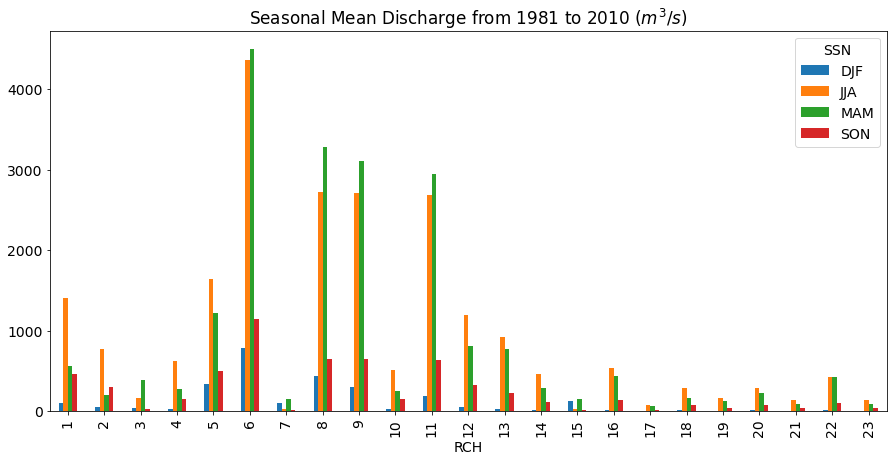

In [99]:
# Plot size to 15" x 7"
matplotlib.rc('figure', figsize = (15, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Display top and right frame lines
matplotlib.rc('axes.spines', top = True, right = True)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

pivoted.plot(kind='bar', title='Seasonal Mean Discharge from 1981 to 2010 ($m^3/s$)')

### Summary


In this tutorial we have seen how easy it is to link a SQLite database operations to Pandas via sql%. Moreover, we use Python tools such as Pandas do more further analysis after retrieving data.

## Using SQLite as a Time Series Database

SQLite supports five ***date*** and ***time*** functions as follows:
1. date(timestring, modifier, modifier, ...)
2. time(timestring, modifier, modifier, ...)
3. datetime(timestring, modifier, modifier, ...)
4. julianday(timestring, modifier, modifier, ...)
5. strftime(format, timestring, modifier, modifier, ...)

All five date and time functions take a time string as an argument. The time string is followed by zero or more modifiers. The strftime() function also takes a format string as its first argument. With these date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

In this notebook, we will create a table to save man-made temperature data at different dates and times. You can presume that they are collected from some kind of temperature sensors.

This notebook will present:

- Practice date and time functions
- Create a temperature table and index
- Insert data into the temperature table
- Query

In [100]:
%reload_ext sql

In [101]:
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

### 1. Connect to database

It was mentioned before the demo.db3 is extracted from a hydrological modelling. As a result, the data in each table is tidy and complete without NULL values. However, we can create a table with NULL values for demo.

In [102]:
%sql sqlite:///data/demo.db3

### 2. Play with date and time functions

You can find more example from [lang_datefunc](https://www.sqlite.org/lang_datefunc.html) or [sqlite_date_time](https://www.tutorialspoint.com/sqlite/sqlite_date_time.htm)

- Compute the current date.

In [103]:
%sql SELECT date('now');

 * sqlite:///data/demo.db3
Done.


date('now')
2022-06-27


- Compute the last day of the current month.

In [104]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///data/demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-06-30


- Compute the date of the first Tuesday in October for the current year.

In [105]:
%sql SELECT date('now','start of year','+9 months','weekday 2');

 * sqlite:///data/demo.db3
Done.


"date('now','start of year','+9 months','weekday 2')"
2022-10-04


### 3. Create a table of time series temperature 

#### 3.1 Create table

only with two columns of timestamp and Temperature

In [106]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

#### 3.2 Create an index

For efficient querying, we'll want to index the timestamp column.

In [107]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

#### 3.3 Insert data

Make 500 rows of data and temperature ranges between 18 to 26.

In [108]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);  

 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 row

### 4. Play with time series table

#### 4.1 Simple Query

In [109]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///data/demo.db3
Done.


Date,Temperature
2021-02-12 13:02:41,22.056252686366054
2021-02-13 13:02:41,18.232660429584435
2021-02-14 13:02:41,18.688034640791038
2021-02-15 13:02:41,25.79934916197453
2021-02-16 13:02:41,25.940920542507527


#### 4.2 Filter with a datetime

In [110]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2017-12-31 14:21:45'

Done.


Date,Temperature


#### 4.3 Query data at a specific year

Use CAST string to integer as strftime returns a string.

In [111]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2017

Done.


Date,Temperature


#### 4.5 Aggregate yearly

In [112]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp) 

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.075782176082726,25.99782409003225,18.009814101495024
2022,22.063967737284344,25.92255260100257,18.101248518207704


### 5. Visualization

Here we convert SQL query results into Pandas DataFrame.

In [113]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///data/demo.db3
Done.


DatetimeIndex(['2021-02-12 13:02:41', '2021-02-13 13:02:41',
               '2021-02-14 13:02:41', '2021-02-15 13:02:41',
               '2021-02-16 13:02:41', '2021-02-17 13:02:41',
               '2021-02-18 13:02:41', '2021-02-19 13:02:41',
               '2021-02-20 13:02:41', '2021-02-21 13:02:41',
               ...
               '2022-06-17 13:02:41', '2022-06-18 13:02:41',
               '2022-06-19 13:02:41', '2022-06-20 13:02:41',
               '2022-06-21 13:02:41', '2022-06-22 13:02:41',
               '2022-06-23 13:02:41', '2022-06-24 13:02:41',
               '2022-06-25 13:02:41', '2022-06-26 13:02:41'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

<AxesSubplot:xlabel='date'>

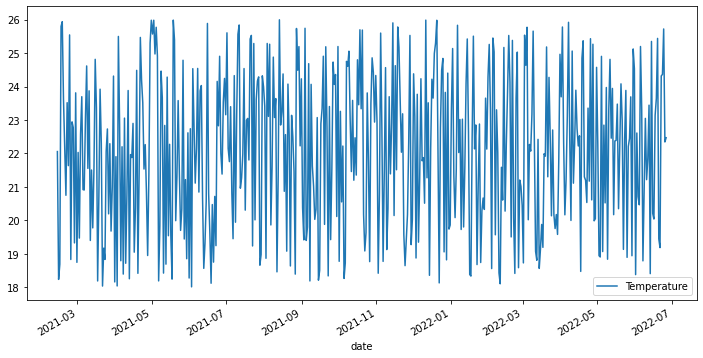

In [114]:
df.plot(figsize=(12, 6))

### Summary and References

Time series databases (TSDBs) are getting popular these days. There are quite a few [TSDbs](https://en.wikipedia.org/wiki/Time_series_database) such as InfluxDB, Graphite, Druid, Kairos, and Prometheus. With the SQLite date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database. 

https://www.sqlite.org/lang_datefunc.html

https://www.tutorialspoint.com/sqlite/sqlite_date_time.htm

## Transaction (Begin, Commit, Rollback)

Generally the SQLite is in auto-commit mode that means SQLite automatically starts a transaction for each command, process and commit the transaction changes automatically to database. However, we still can disable auto-commit mode and use the following three commands to control these transactions to maintain data consistency and to handle database errors based on our requirements:

- BEGIN – start the transaction;
- COMMIT – commit the transaction that means all the changes saved to database;
- ROLLBACK – rollback the complete transaction.

Transactional control commands are only used with commands INSERT, UPDATE, and DELETE. They cannot be used while creating tables or dropping them because these operations are automatically committed in the database.

In this notebook, we will have a test on the command of ***DELETE***, only because we already practiced UPDATE and INSERT before. In addition, we will use the ***[sqlite3](https://docs.python.org/2/library/sqlite3.html)*** package because ipython_sql does not support transactions.

The ***DELETE*** is a very dangerous command so it is better to firstly back up your database before applying it. 

In [115]:
import sqlite3 as lite
import sys

### 1. Connect to database

In [116]:
con = lite.connect('data/demo.db3')

### 2. Make a test table

This time, we still use the table of watershed_yearly to make a test table just as we did in the previous notebook.

In [117]:
with con:
    cur = con.cursor() 
    
    sql = """
    DROP TABLE  IF EXISTS watershed_yearly_bk;
    CREATE TABLE watershed_yearly_bk AS SELECT YR, PREC_mm FROM watershed_yearly
    """
    
    cur.executescript(sql)    

Make some NULLs

In [118]:
with con:
    cur = con.cursor()
    sql = """
    UPDATE watershed_yearly_bk
    SET PREC_mm = NULL
    WHERE
    PREC_mm < 850.0
    """    
    cur.executescript(sql)    

Have a quick view

In [119]:
with con:      
    cur = con.cursor()    
    cur.execute("SELECT * FROM watershed_yearly_bk")

    rows = cur.fetchall()

    for row in rows:
        print(row)

(1981, 895.6051025390625)
(1982, 884.670654296875)
(1983, None)
(1984, 867.5743408203125)
(1985, None)
(1986, None)
(1987, 1007.8944702148438)
(1988, 895.8466186523438)
(1989, 930.10546875)
(1990, None)
(1991, 984.4703369140625)
(1992, 907.9463500976562)
(1993, 1057.7733154296875)
(1994, None)
(1995, None)
(1996, None)
(1997, None)
(1998, None)
(1999, None)
(2000, None)
(2001, None)
(2002, None)
(2003, None)
(2004, None)
(2005, 855.0092163085938)
(2006, None)
(2007, None)
(2008, None)
(2009, 1040.9012451171875)
(2010, 905.66845703125)


### 2. ROLLBACK a  DELETE transaction

We'd like to drop/delete all rows with NULL values.

In [120]:
con.isolation_level = None
cur = con.cursor()
cur.execute("BEGIN")
sql = """
      DELETE FROM watershed_yearly_bk WHERE PREC_mm IS NULL
      """
cur = con.execute(sql)
cur.execute("ROLLBACK")

Now check the changes and you can find nothing happend.

In [121]:
cur = con.cursor()    
cur.execute("SELECT * FROM watershed_yearly_bk")

rows = cur.fetchall()

for row in rows:
    print(row)

(1981, 895.6051025390625)
(1982, 884.670654296875)
(1983, None)
(1984, 867.5743408203125)
(1985, None)
(1986, None)
(1987, 1007.8944702148438)
(1988, 895.8466186523438)
(1989, 930.10546875)
(1990, None)
(1991, 984.4703369140625)
(1992, 907.9463500976562)
(1993, 1057.7733154296875)
(1994, None)
(1995, None)
(1996, None)
(1997, None)
(1998, None)
(1999, None)
(2000, None)
(2001, None)
(2002, None)
(2003, None)
(2004, None)
(2005, 855.0092163085938)
(2006, None)
(2007, None)
(2008, None)
(2009, 1040.9012451171875)
(2010, 905.66845703125)


### 3. COMMIT a DELETE transaction

In [122]:
cur = con.cursor()
cur.execute("BEGIN")
sql = """
      DELETE FROM watershed_yearly_bk WHERE PREC_mm IS NULL
      """
cur = con.execute(sql)
cur.execute("COMMIT")

Now check the changes and you can find the rows with NULLs have been deleted.

In [123]:
cur = con.cursor()    
cur.execute("SELECT * FROM watershed_yearly_bk")

rows = cur.fetchall()

for row in rows:
    print(row)

(1981, 895.6051025390625)
(1982, 884.670654296875)
(1984, 867.5743408203125)
(1987, 1007.8944702148438)
(1988, 895.8466186523438)
(1989, 930.10546875)
(1991, 984.4703369140625)
(1992, 907.9463500976562)
(1993, 1057.7733154296875)
(2005, 855.0092163085938)
(2009, 1040.9012451171875)
(2010, 905.66845703125)


### 4. Close the db connection

In [124]:
con.close()

### Summary and References

Using ***sqlite3*** is not that panic because we can easily wrap the query sentences in the previous notebook into strings. This notebook also show there are other ways accessing SQLite database. If you are intested in it, you can try [SQLAlchemy](https://docs.sqlalchemy.org/en/latest/dialects/sqlite.html), which is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.

https://www.tutorialspoint.com/sqlite/sqlite_transactions.htm

https://www.tutlane.com/tutorial/sqlite/sqlite-transactions-begin-commit-rollback.

http://zetcode.com/db/sqlitepythontutorial/

https://docs.sqlalchemy.org/en/latest/dialects/sqlite.html

https://docs.python.org/2/library/sqlite3.html

# Window Functions within SQLite

Window Functions get available sincle SQLite 3.25.According to the SQLite docs:

>A window function is a special SQL function where the input values are taken from a “window” of one or more rows in the results set of a SELECT statement.

SQLite now has these built-in Window functions:

- row_number()
- rank()
- dense_rank()
- percent_rank()
- cume_dist()
- ntile(N)
- lag(expr), lag(expr, offset), lag(expr, offset, default)
- lead(expr), lead(expr, offset), lead(expr, offset, default)
- first_value(expr)
- last_value(expr)
- nth_value(expr, N)

Previous tutorials are created based on a little bit older SQLite versions. At that time, window Functions are not available. In this tutoiral, I am going to touch some of them in the following 5 sections:

- Firstly, give a comparison between SQL Window Functions vs. SQL Aggregate Functions

- Secondly, go through a few WINDOW functions based on regular aggregate functions, such as **AVG**, **MIN/MAX**, **COUNT**, **SUM**.

- Thirdly, focus on rank-related functions, such as **ROW_NUMBER**, **RANK**,and **RANK_DENSE**. Those functions are handy when generating ranking indexes, and you need to be fluent in those functions before entering a data scientist SQL interview.

- Forthly, talk about generating statistics (e.g., percentiles, quartiles, median, etc .) with the **NTILE** function, a common task for a data scientist.

- Fifthly, focus on **LAG** and **LEAD**, two functions that are super important if you are interviewing for a role that requires dealing with time-series data.


## 1. [Window Functions vs. Aggregate Functions](https://learnsql.com/blog/window-functions-vs-aggregate-functions/)

In the previous tutorials, we presented some application cases of Aggregate Functions. What are the Similarities and Differences between them? Let's have a quick gothrough.

### 1.1 Aggregate functions

*Aggregate functions* operate on a set of values to return a single scalar value. These are SQL aggregate functions:

- AVG() returns the average of the specified values.
- SUM() calculates the sum of all values in the set.
- MAX() and MIN() return the maximum and minimum value, respectively.
-COUNT() returns the total number of values in the set.

By using the GROUP BY clause, you can calculate an aggregate value for several groups in one query. That is to say, ***aggregate functions*** collapse the individual rows and present the aggregate value for all the rows in the group.


### 1.2 Window functions

*Window functions* operate on a set of rows called a window frame. They return a single value for each row from the underlying query.

The window frame (or simply window) is defined using the OVER() clause. This clause also allows defining a window based on a specific column (similar to GROUP BY).

To calculate the returned values, window functions may use aggregate functions, but they will use them with the OVER() clause.

### 1.3 Similarities and Differences Between Window and Aggregate Functions

Now that we have seen both types of functions, we can summarize the similarities and differences between them.

***Both window functions and aggregate functions:***

- Operate on a set of values (rows).
- Can calculate aggregate amounts (e.g. AVG(), SUM(), MAX(), MIN(), or COUNT()) on the set.
- Can group or partition data on one or more columns.

***Aggregate functions with GROUP BY differ from window functions in that they:***

- Use GROUP BY() to define a set of rows for aggregation. 
- Group rows based on column values.
- Collapse rows based on the defined groups.


***Window functions differ from aggregate functions used with GROUP BY in that they:***

- Use OVER() instead of GROUP BY() to define a set of rows.
- May use many functions other than aggregates (e.g. RANK(), LAG(), or LEAD()).
- Groups rows on the row’s rank, percentile, etc. as well as its column value.
- Do not collapse rows.
- May use a sliding window frame (which depends on the current row).

## 2. Practive window functions

Let's connect the demo database, firstly.

In [125]:
%reload_ext sql

In [126]:
%sql sqlite:///data/demo.db3

### 2.1 WINDOW functions based on regular aggregate functions: AVG, MIN/MAX, SUM, COUNT

Window functions are functions that perform calculations across a set of rows related to the current row.

It is comparable to the type of calculation done with an aggregate function, but unlike regular aggregate functions, window functions do not group several rows into a single output row — the rows retain their own identities.

Behind the scenes, the window functions process more than just the query results' current row.

Let's take the ***watershed_monthly*** as the demo table.

#### 2.1.1 AVG

In [127]:
%%sql sqlite://
SELECT
    YR,
    MO,
    PREC_mm,
    ROUND(AVG(PREC_mm) OVER(PARTITION BY MO)) AS avg_PREC_mm
FROM watershed_monthly
ORDER by MO

Done.


YR,MO,PREC_mm,avg_PREC_mm
1981,1,96.2901611328125,114.0
1982,1,59.744789123535156,114.0
1983,1,94.48113250732422,114.0
1984,1,111.43696594238281,114.0
1985,1,78.43978881835938,114.0
1986,1,45.433536529541016,114.0
1987,1,146.7594757080078,114.0
1988,1,106.8199234008789,114.0
1989,1,97.1476821899414,114.0
1990,1,84.20606994628906,114.0


There is no **GROUP BY** clause for the AVG function, but how does the SQL engine know which rows to use to compute the average? The answer is the **PARTITION BY** clause inside the **OVER()** utility, and we are calculating the average based on a unique value of rating.

In the final output, every row has the average PREC_mm from the same month (*MO*). By adding a ***ORDER by***, you will find there is the same averge value for each month.

#### 2.1.2 SUM

Let’s take a look at a more complicated example, where we calculated a running sum with a window function.

In [128]:
%%sql sqlite://
SELECT
    YR,
    MO,
    PREC_mm,    
    SUM(PREC_mm) OVER(ORDER BY MO) AS running_total,
    SUM(PREC_mm) OVER() AS overall,
    ROUND(SUM(PREC_mm) OVER(ORDER BY MO) * 100.0 /SUM(PREC_mm) OVER(), 2) AS running_percentage
FROM watershed_monthly

Done.


YR,MO,PREC_mm,running_total,overall,running_percentage
1981,1,96.2901611328125,3408.3335914611816,24084.3432366848,14.15
1982,1,59.744789123535156,3408.3335914611816,24084.3432366848,14.15
1983,1,94.48113250732422,3408.3335914611816,24084.3432366848,14.15
1984,1,111.43696594238281,3408.3335914611816,24084.3432366848,14.15
1985,1,78.43978881835938,3408.3335914611816,24084.3432366848,14.15
1986,1,45.433536529541016,3408.3335914611816,24084.3432366848,14.15
1987,1,146.7594757080078,3408.3335914611816,24084.3432366848,14.15
1988,1,106.8199234008789,3408.3335914611816,24084.3432366848,14.15
1989,1,97.1476821899414,3408.3335914611816,24084.3432366848,14.15
1990,1,84.20606994628906,3408.3335914611816,24084.3432366848,14.15


Notice that there is no **PARTITION BY** clause because I am not grouping those  into any PREC_mm sub-categories. I want to compute my overall progress but not based on any subgroups or categories.

Another thing to notice is that if I don’t add anything inside the **OVER()** function, I get the total number of PREC_mm from the entire table. As you can see from the second last column: they all have the same value of **24084.34**, but after I add the **ORDER BY** clause, I get the running total of the PREC_mm up to that specific row (**running_total** column).

#### 2.1.3 Others

You can try ***MIN***, ***COUNT**, ***AVG*** by yourself, which are all similar to prevois examples of ***SUM*** and ***MAX**.

### 2.2 ROW_NUMBER, RANK, DENSE_RANK


Let’s go through some of the essential WINDOW functions: **ROW_NUMBER** and **RANK**. In the following example, our goal is to create a ranking index based on the amount of PREC_mm for the entire table.

#### 2.2.1 ROW_NUMBER

In [129]:
%%sql sqlite://
SELECT
    YR,
    MO,
    PREC_mm,  
    ROW_NUMBER() OVER(ORDER BY PREC_mm DESC) AS row_num
FROM watershed_monthly
ORDER by row_num

Done.


YR,MO,PREC_mm,row_num
2007,1,206.89495849609375,1
1992,2,189.6724853515625,2
2009,12,184.78343200683594,3
1987,2,184.14231872558594,4
1988,2,183.34051513671875,5
1996,2,181.6288604736328,6
2005,1,178.54624938964844,7
2010,2,173.24346923828125,8
1996,1,171.72898864746094,9
1991,11,169.23207092285156,10


As you can see, the ROW_NUMBER function generates a sequence of integers, starting from 1, for each row.

#### 2.2.2 ROW_NUMBER over PARTITION

Let’s take a look at another example. Instead of comparing a amount of PREC_mm to all other PREC_mm from the entire table, we can rank them within each month using **PARTITION BY**.

In [130]:
%%sql sqlite://
SELECT
    YR,
    MO,
    PREC_mm,  
    ROW_NUMBER() OVER(PARTITION BY MO ORDER BY PREC_mm DESC) AS row_num
FROM watershed_monthly
ORDER by row_num

Done.


YR,MO,PREC_mm,row_num
2007,1,206.89495849609375,1
1992,2,189.6724853515625,1
1992,3,160.9407501220703,1
1993,4,168.93685913085938,1
1983,5,88.9581527709961,1
1987,6,74.57366943359375,1
1983,7,52.85027313232422,1
2008,8,66.79488372802734,1
2006,9,117.03430938720703,1
2007,10,138.5694122314453,1


**ROW_NUMBER** with **OVER** and **PARTITION BY** is a regular pattern that is frequently used in advanced SQL.

#### 2.2.3 Others

Now you can try the **RANK** and ***DENSE_RANK*** functions by yourself as they are very similar to **ROW_NUMBER**. The difference between **RANK** and **ROW_NUMBER** is that **RANK** assigns the same unique values if there is a tie and restarts the next value with the total number of rows up to that row.

**DENSE_RANK**. It is very similar to **RANK** but differs in how it handles ties. It restarts with the following immediate consecutive value rather than creating a gap.

### 2.3 NTILE

**NTILE** is a handy function, especially for data analytics professionals. For example, as a data scientist, you probably need to create robust statistics such as quartile, quintile, median, etc., in your daily job, and **NTILE** makes it very easy to generate those numbers.

**NTILE** takes an argument of the number of buckets and then creates this number of buckets as equally as possible, based on how the rows are partitioned and ordered inside the **OVER** function.

In [131]:
%%sql sqlite://
SELECT
    YR,
    MO,
    PREC_mm,  
    NTILE(100) OVER(ORDER BY PREC_mm) AS percentile
FROM watershed_monthly
ORDER BY percentile;

Done.


YR,MO,PREC_mm,percentile
2000,6,2.1060729026794434,1
1997,7,2.399183750152588,1
2003,5,3.178541898727417,1
1997,6,3.311275005340576,1
1990,8,3.512204170227051,2
1997,8,3.7355682849884033,2
1994,6,3.8289220333099365,2
1996,7,4.332550525665283,2
2001,5,4.57631254196167,3
2002,6,5.1767730712890625,3


You can create a few more statistics, such as **DECILES** (10 buckets) and **QUARTILES** (4 buckets).

### 2.4 LAG and Lead

**LAG** and **LEAD**, which are extremely useful for dealing with time-related data. The main difference between them is that LAG gets data from previous rows, while LEAD is the opposite, which fetches data from the following rows. We can use either one of the two functions to compare month-over-month growth. 

Their syntax is very similar to other window functions. Instead of focusing on the format of the syntax, let me show you a couple of examples.

#### 2.4.1 LAG

1. In the first step, we created a temporal table of ann_total with PREC_mm.

2. And in the second step, we appended the previous year’s Ann_PREC_mm to the current year’s using the LAG function.

3. Notice that last 2 columns of the first row are empty. It’s simply because 1981 is the first available year.

4. We also specified the offset, which is 1, so we fetch the next row. If you change this number to 2, then you compare the current year’s Ann_PREC_mm to the year before the previous year.

5. Finally, we divided the current year’s Ann_PREC_mm by the previous year’s to create our year Ann_PREC_mm growth.

In [132]:
%%sql sqlite://
WITH annul_total AS (
    SELECT
        YR,    
        SUM(PREC_mm) AS Ann_PREC_mm    
    FROM watershed_monthly
    GROUP by YR
)

SELECT
    YR,
    Ann_PREC_mm,
    LAG(Ann_PREC_mm, 1) OVER (ORDER BY YR) prev_year_total,
    ROUND(Ann_PREC_mm *1.0/LAG(Ann_PREC_mm,1) OVER (ORDER BY YR), 2) AS dod
FROM annul_total
ORDER BY YR

Done.


YR,Ann_PREC_mm,prev_year_total,dod
1981,895.6051273345947,None,None
1982,884.6707439422607,895.6051273345947,0.99
1983,816.6605195999146,884.6707439422607,0.92
1984,867.5743923187256,816.6605195999146,1.06
1985,637.7255153656006,867.5743923187256,0.74
1986,733.8411979675293,637.7255153656006,1.15
1987,1007.8945198059082,733.8411979675293,1.37
1988,895.8465557098389,1007.8945198059082,0.89
1989,930.1055030822754,895.8465557098389,1.04
1990,751.4553575515747,930.1055030822754,0.81


#### 2.4.2 LEAD

Let’s take a look at another example. It’s very similar to the previous one, but instead of appending the previous year’s Ann_PREC_mm, we used the **LEAD** function with an offset of 1 to get the next year’s Ann_PREC_mm.

We then divided the next year’s Ann_PREC_mm by the current year’s Ann_PREC_mm to get the year-over-year growth.

Notice that last 2 columns of the last two rows are empty. It’s simply because 2010 and 2009 is the first two available years.

In [133]:
%%sql sqlite://
WITH annul_total AS (
    SELECT
        YR,    
        SUM(PREC_mm) AS Ann_PREC_mm    
    FROM watershed_monthly
    GROUP by YR
)

SELECT
    YR,
    Ann_PREC_mm,
    LEAD(Ann_PREC_mm, 2) OVER (ORDER BY YR) prev_year_total,
    ROUND(Ann_PREC_mm *1.0/LEAD(Ann_PREC_mm,2) OVER (ORDER BY YR), 2) AS dod
FROM annul_total
ORDER BY YR

Done.


YR,Ann_PREC_mm,prev_year_total,dod
1981,895.6051273345947,816.6605195999146,1.1
1982,884.6707439422607,867.5743923187256,1.02
1983,816.6605195999146,637.7255153656006,1.28
1984,867.5743923187256,733.8411979675293,1.18
1985,637.7255153656006,1007.8945198059082,0.63
1986,733.8411979675293,895.8465557098389,0.82
1987,1007.8945198059082,930.1055030822754,1.08
1988,895.8465557098389,751.4553575515747,1.19
1989,930.1055030822754,984.4703512191772,0.94
1990,751.4553575515747,907.946213722229,0.83


## Summary

Congratulations! If you have followed through all the examples and have seen most of the common **WINDOW functions/patterns**.

WINDOW functions are a family of SQL utilities, which provide some extremely powerful and useful features. But for many, since they are so foreign to standard SQL, they are difficult to learn and understand, have strange syntax—and are very often avoided. Writing a bug-free WINDOW function query could be quite challenging. It takes time and practice to become a master, and you are getting there soon.


## References and resources

https://sqlite.org/windowfunctions.html

https://learnsql.com/blog/window-functions-vs-aggregate-functions/

https://blog.jupyter.org/a-jupyter-kernel-for-sqlite-9549c5dcf551

https://blog.xojo.com/2018/12/18/sqlite-3-25-adds-window-functions-and-improves-alter-table/

https://sqlpad.io/playground/